In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Assuming you have 'economic_data' DataFrame from previous setup
# If not, load it:
economic_data = pd.read_csv('/Users/jessicabean/Library/CloudStorage/OneDrive-Personal/porftfolio.github.io/projects/economic_indicators/data/raw/economic_indicators.csv', index_col=0, parse_dates=True)

print("="*60)
print("EXPLORATORY DATA ANALYSIS - ECONOMIC INDICATORS")
print("="*60)


EXPLORATORY DATA ANALYSIS - ECONOMIC INDICATORS


In [2]:
# ============================================
# STEP 1: DATA OVERVIEW
# ============================================


In [3]:
print("\n📊 STEP 1: DATA OVERVIEW")
print("-"*60)



📊 STEP 1: DATA OVERVIEW
------------------------------------------------------------


In [4]:
def data_overview(df):
    """
    Comprehensive data overview
    """
    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"\nDate Range: {df.index.min().date()} to {df.index.max().date()}")
    print(f"Total Time Span: {(df.index.max() - df.index.min()).days} days")
    
    print("\n📋 Column Names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i}. {col}")
    
    print("\n📈 Data Types:")
    print(df.dtypes)
    
    print("\n🔍 First 5 Rows:")
    display(df.head())
    
    print("\n🔍 Last 5 Rows:")
    display(df.tail())
    
    print("\n📏 Dataset Info:")
    df.info()

data_overview(economic_data)


Dataset Shape: 190 rows × 8 columns

Date Range: 2010-01-01 to 2025-10-01
Total Time Span: 5752 days

📋 Column Names:
  1. Unemployment Rate
  2. Consumer Price Index
  3. Gross Domestic Product
  4. Federal Funds Rate
  5. Housing Starts
  6. Consumer Sentiment
  7. Industrial Production
  8. Total Nonfarm Payrolls

📈 Data Types:
Unemployment Rate         float64
Consumer Price Index      float64
Gross Domestic Product    float64
Federal Funds Rate        float64
Housing Starts            float64
Consumer Sentiment        float64
Industrial Production     float64
Total Nonfarm Payrolls    float64
dtype: object

🔍 First 5 Rows:


,Unemployment Rate,Consumer Price Index,Gross Domestic Product,Federal Funds Rate,Housing Starts,Consumer Sentiment,Industrial Production,Total Nonfarm Payrolls
2010-01-01,9.8,217.488,14764.610,0.11,614.0,74.4,89.1897,129802.0
2010-02-01,9.8,217.281,NaN,0.13,604.0,73.6,89.5046,129705.0
2010-03-01,9.9,217.353,NaN,0.16,636.0,73.6,90.1356,129865.0
2010-04-01,9.9,217.403,14980.193,0.20,687.0,72.2,90.4607,130120.0
2010-05-01,9.6,217.290,NaN,0.20,583.0,73.6,91.7014,130643.0



🔍 Last 5 Rows:


,Unemployment Rate,Consumer Price Index,Gross Domestic Product,Federal Funds Rate,Housing Starts,Consumer Sentiment,Industrial Production,Total Nonfarm Payrolls
2025-06-01,4.1,321.500,NaN,4.33,1382.0,60.7,104.2115,159439.0
2025-07-01,4.2,322.132,NaN,4.33,1429.0,61.7,103.8194,159511.0
2025-08-01,4.3,323.364,NaN,4.33,1307.0,58.2,103.9203,159507.0
2025-09-01,4.4,324.368,NaN,4.22,NaN,55.1,NaN,159626.0
2025-10-01,NaN,NaN,NaN,4.09,NaN,53.6,NaN,NaN



📏 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2010-01-01 to 2025-10-01
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unemployment Rate       189 non-null    float64
 1   Consumer Price Index    189 non-null    float64
 2   Gross Domestic Product  62 non-null     float64
 3   Federal Funds Rate      190 non-null    float64
 4   Housing Starts          188 non-null    float64
 5   Consumer Sentiment      190 non-null    float64
 6   Industrial Production   188 non-null    float64
 7   Total Nonfarm Payrolls  189 non-null    float64
dtypes: float64(8)
memory usage: 13.4 KB


# ============================================
# STEP 2: MISSING DATA ANALYSIS
# ============================================


In [5]:
print("\n" + "="*60)
print("📊 STEP 2: MISSING DATA ANALYSIS")
print("-"*60)



📊 STEP 2: MISSING DATA ANALYSIS
------------------------------------------------------------



🔴 Missing Data Summary:
                        Missing_Count  Percentage
Gross Domestic Product            128   67.368421
Housing Starts                      2    1.052632
Industrial Production               2    1.052632
Unemployment Rate                   1    0.526316
Consumer Price Index                1    0.526316
Total Nonfarm Payrolls              1    0.526316


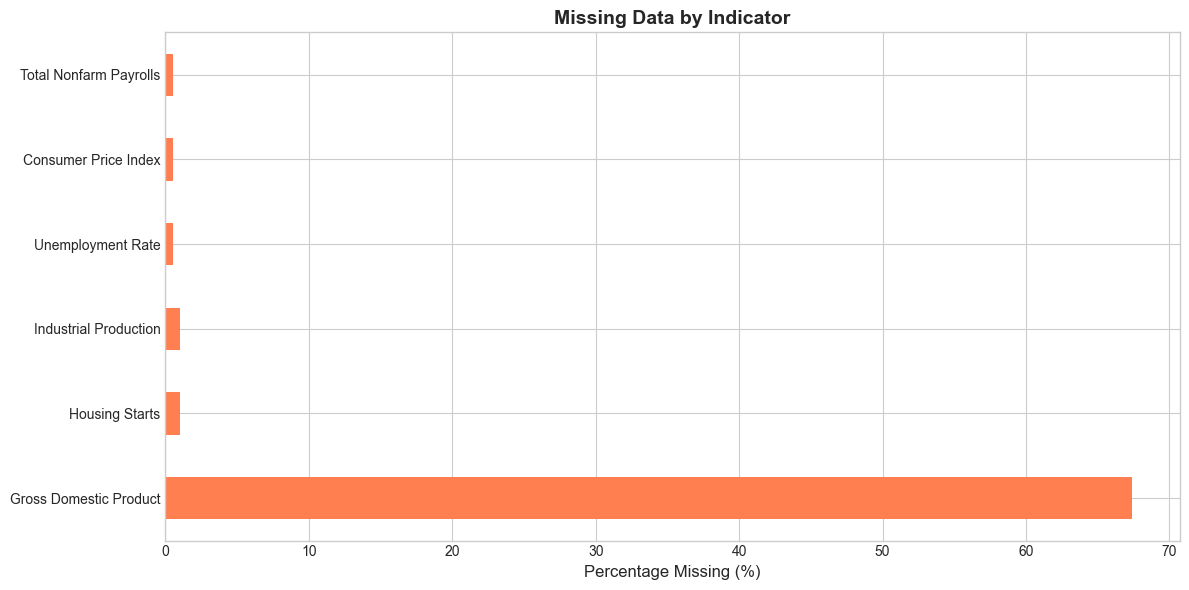

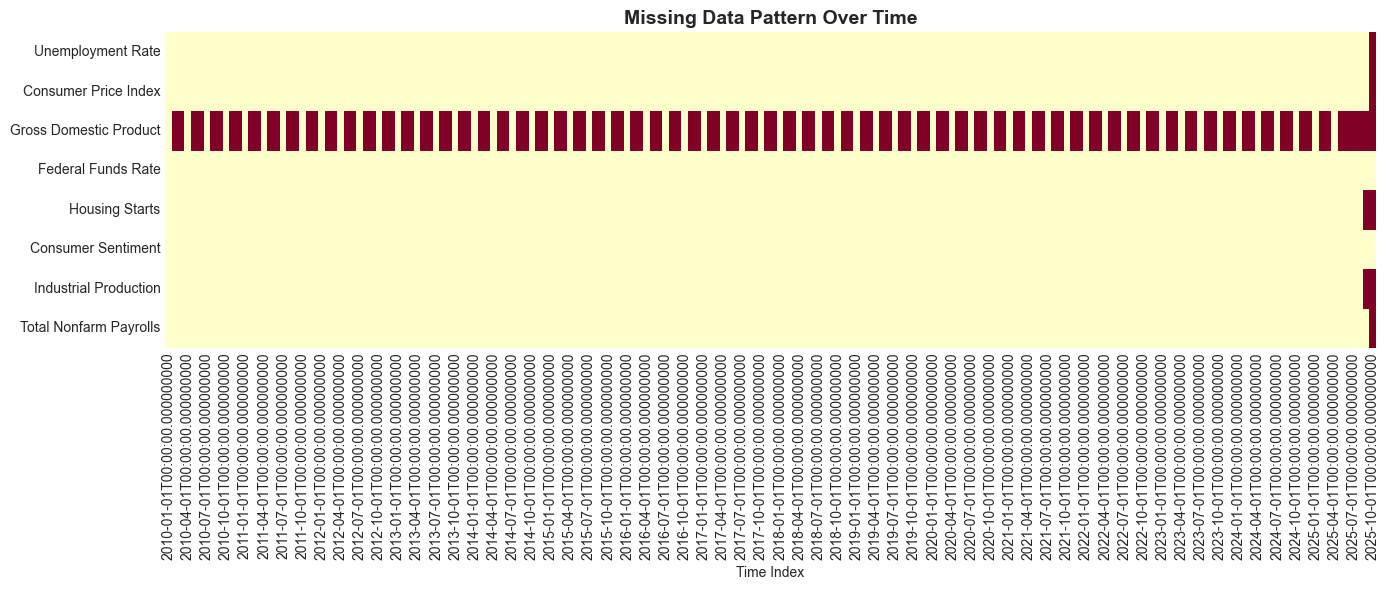

In [6]:
def analyze_missing_data(df):
    """
    Detailed missing data analysis
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Percentage': missing_pct
    }).sort_values('Percentage', ascending=False)
    
    print("\n🔴 Missing Data Summary:")
    print(missing_df[missing_df['Missing_Count'] > 0])
    
    if missing_df['Missing_Count'].sum() == 0:
        print("✅ No missing values found!")
    else:
        # Visualize missing data
        plt.figure(figsize=(12, 6))
        missing_df[missing_df['Missing_Count'] > 0]['Percentage'].plot(
            kind='barh', color='coral'
        )
        plt.xlabel('Percentage Missing (%)', fontsize=12)
        plt.title('Missing Data by Indicator', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Missing data pattern over time
        if missing.sum() > 0:
            plt.figure(figsize=(14, 6))
            sns.heatmap(df.isnull().T, cbar=False, cmap='YlOrRd', yticklabels=True)
            plt.title('Missing Data Pattern Over Time', fontsize=14, fontweight='bold')
            plt.xlabel('Time Index')
            plt.tight_layout()
            plt.show()

analyze_missing_data(economic_data)


# ============================================
# STEP 3: DESCRIPTIVE STATISTICS
# ============================================


In [7]:
print("\n" + "="*60)
print("📊 STEP 3: DESCRIPTIVE STATISTICS")
print("-"*60)


📊 STEP 3: DESCRIPTIVE STATISTICS
------------------------------------------------------------


In [8]:
def descriptive_stats(df):
    """
    Comprehensive descriptive statistics
    """
    print("\n📈 Summary Statistics:")
    stats_df = df.describe().T
    stats_df['range'] = stats_df['max'] - stats_df['min']
    stats_df['coef_var'] = (stats_df['std'] / stats_df['mean']) * 100
    print(stats_df)
    
    print("\n📊 Additional Statistics:")
    additional_stats = pd.DataFrame({
        'Median': df.median(),
        'Mode': df.mode().iloc[0],
        'Skewness': df.skew(),
        'Kurtosis': df.kurtosis()
    })
    print(additional_stats)
    
    return stats_df, additional_stats

summary_stats, additional_stats = descriptive_stats(economic_data)



📈 Summary Statistics:
                        count           mean          std          min  \
Unemployment Rate       189.0       5.721693     2.209651       3.4000   
Consumer Price Index    189.0     257.325614    31.246571     217.1990   
Gross Domestic Product   62.0   20883.681113  4606.917964   14764.6100   
Federal Funds Rate      190.0       1.390632     1.806831       0.0500   
Housing Starts          188.0    1161.276596   317.727270     517.0000   
Consumer Sentiment      190.0      79.573684    13.516799      50.0000   
Industrial Production   188.0      99.699535     3.773637      84.6812   
Total Nonfarm Payrolls  189.0  144671.962963  8898.733201  129705.0000   

                                 25%          50%            75%          max  \
Unemployment Rate            3.90000       4.9000       7.500000      14.8000   
Consumer Price Index       234.71900     247.2840     276.528000     324.3680   
Gross Domestic Product   17193.44875   19825.4430   23843.261750   

# ============================================
# STEP 4: TIME SERIES VISUALIZATION
# ============================================


In [9]:
print("\n" + "="*60)
print("📊 STEP 4: TIME SERIES VISUALIZATION")
print("-"*60)



📊 STEP 4: TIME SERIES VISUALIZATION
------------------------------------------------------------


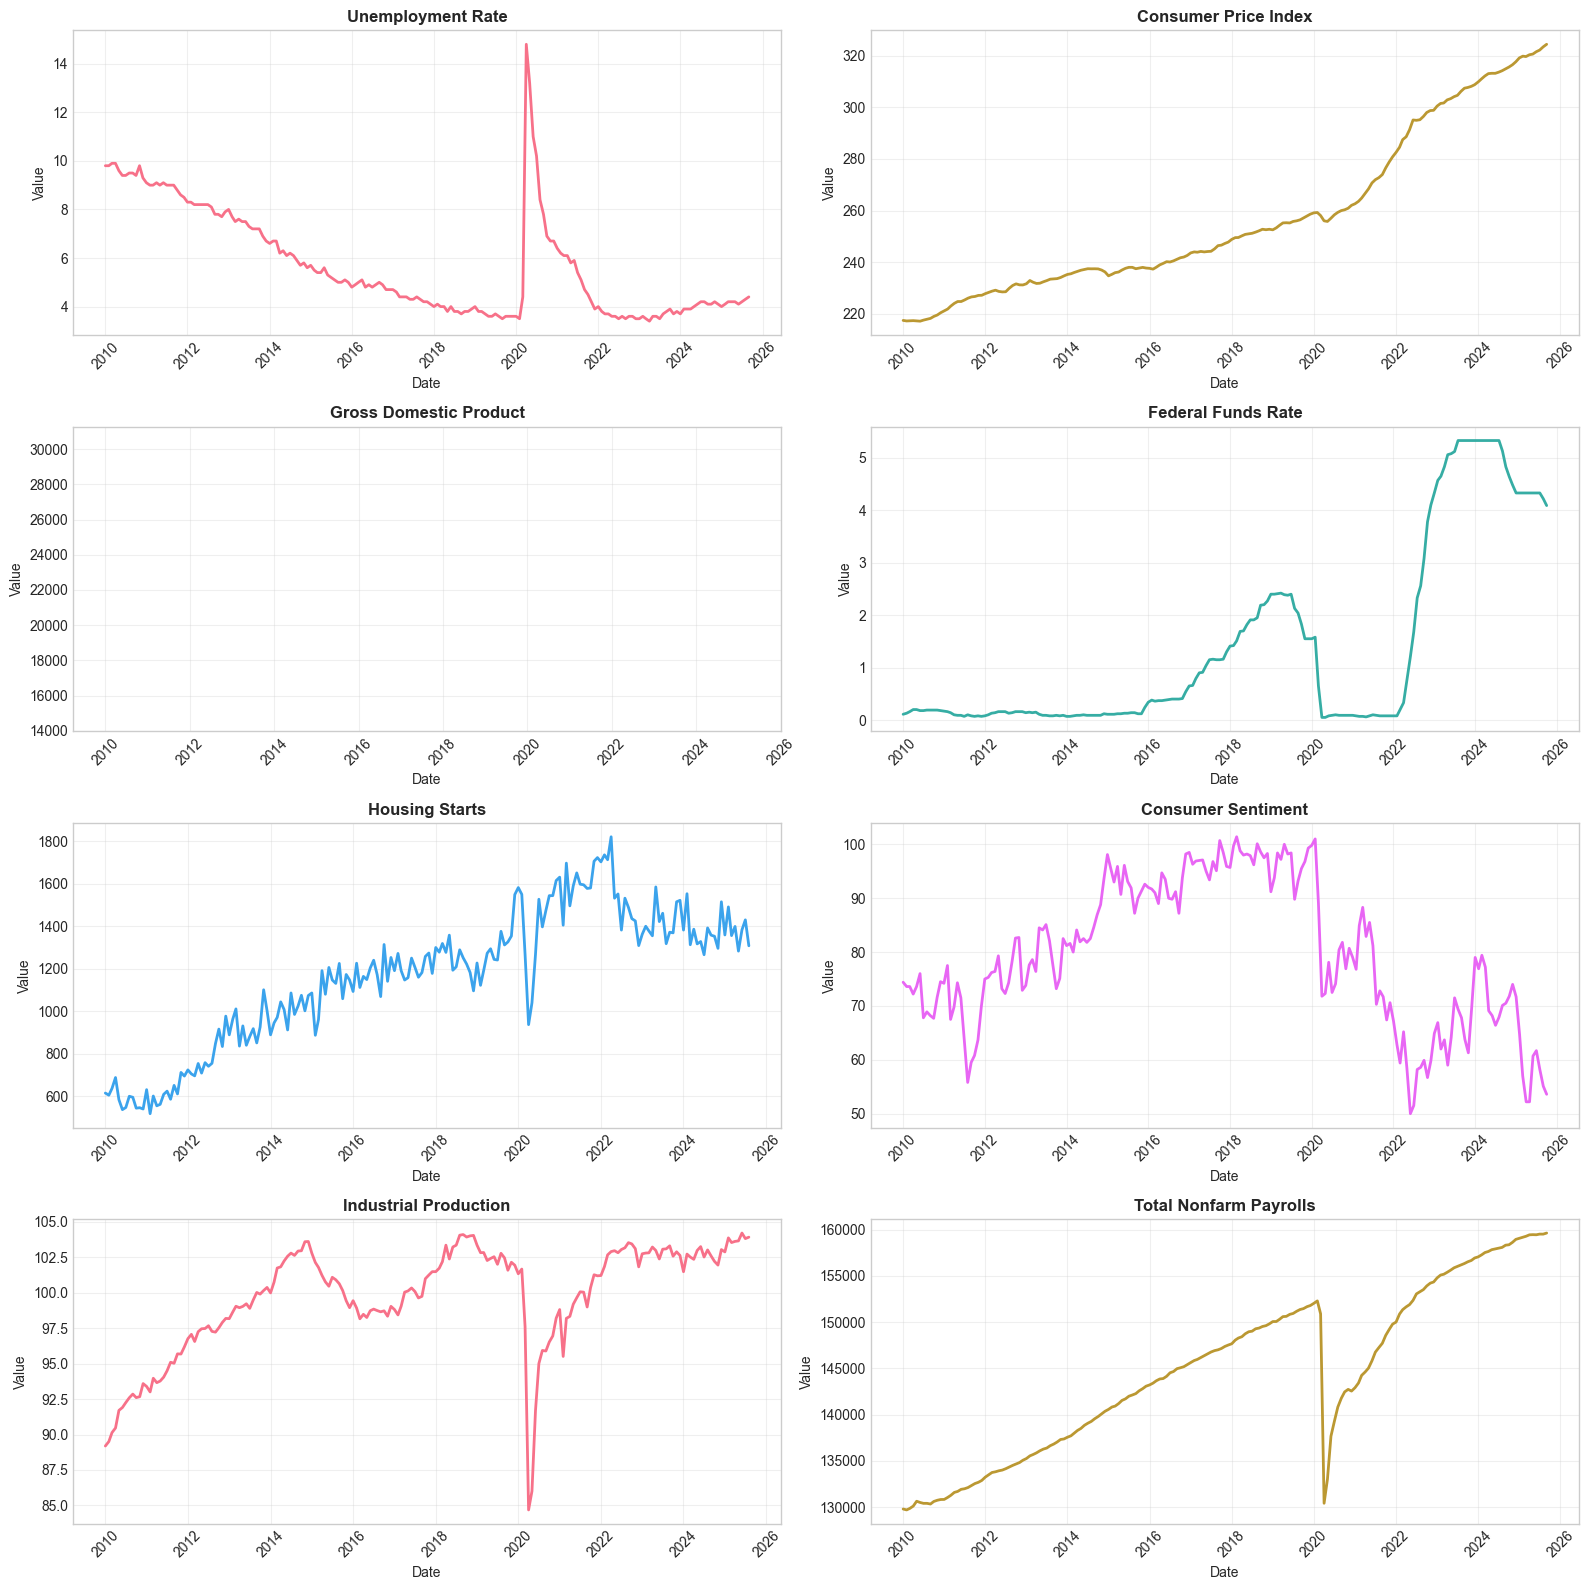

In [10]:
def plot_all_indicators(df):
    """
    Plot all indicators in a grid
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        axes[idx].plot(df.index, df[col], linewidth=2, color=f'C{idx}')
        axes[idx].set_title(col, fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

plot_all_indicators(economic_data)


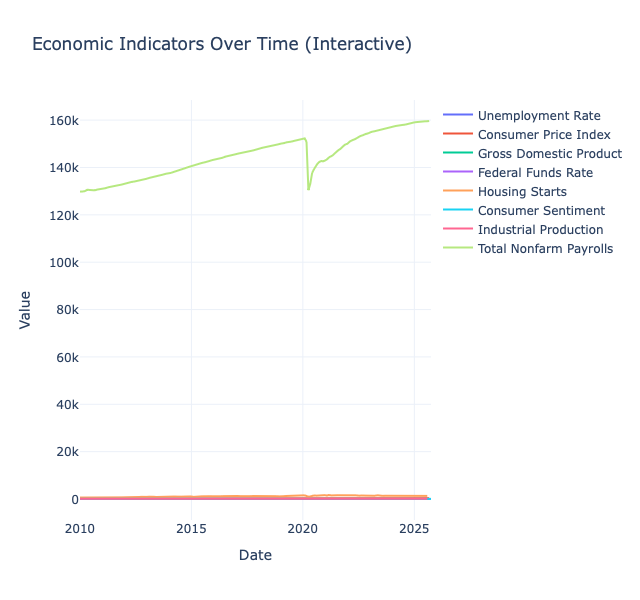

In [11]:
# Interactive version with Plotly
def plot_interactive_indicators(df):
    """
    Create interactive Plotly visualization
    """
    fig = go.Figure()
    
    for col in df.columns:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[col],
            name=col,
            mode='lines',
            line=dict(width=2)
        ))
    
    fig.update_layout(
        title='Economic Indicators Over Time (Interactive)',
        xaxis_title='Date',
        yaxis_title='Value',
        hovermode='x unified',
        height=600,
        template='plotly_white'
    )
    
    fig.show()

plot_interactive_indicators(economic_data)


# ============================================
# STEP 5: DISTRIBUTION ANALYSIS
# ============================================


In [12]:
print("\n" + "="*60)
print("📊 STEP 5: DISTRIBUTION ANALYSIS")
print("-"*60)



📊 STEP 5: DISTRIBUTION ANALYSIS
------------------------------------------------------------


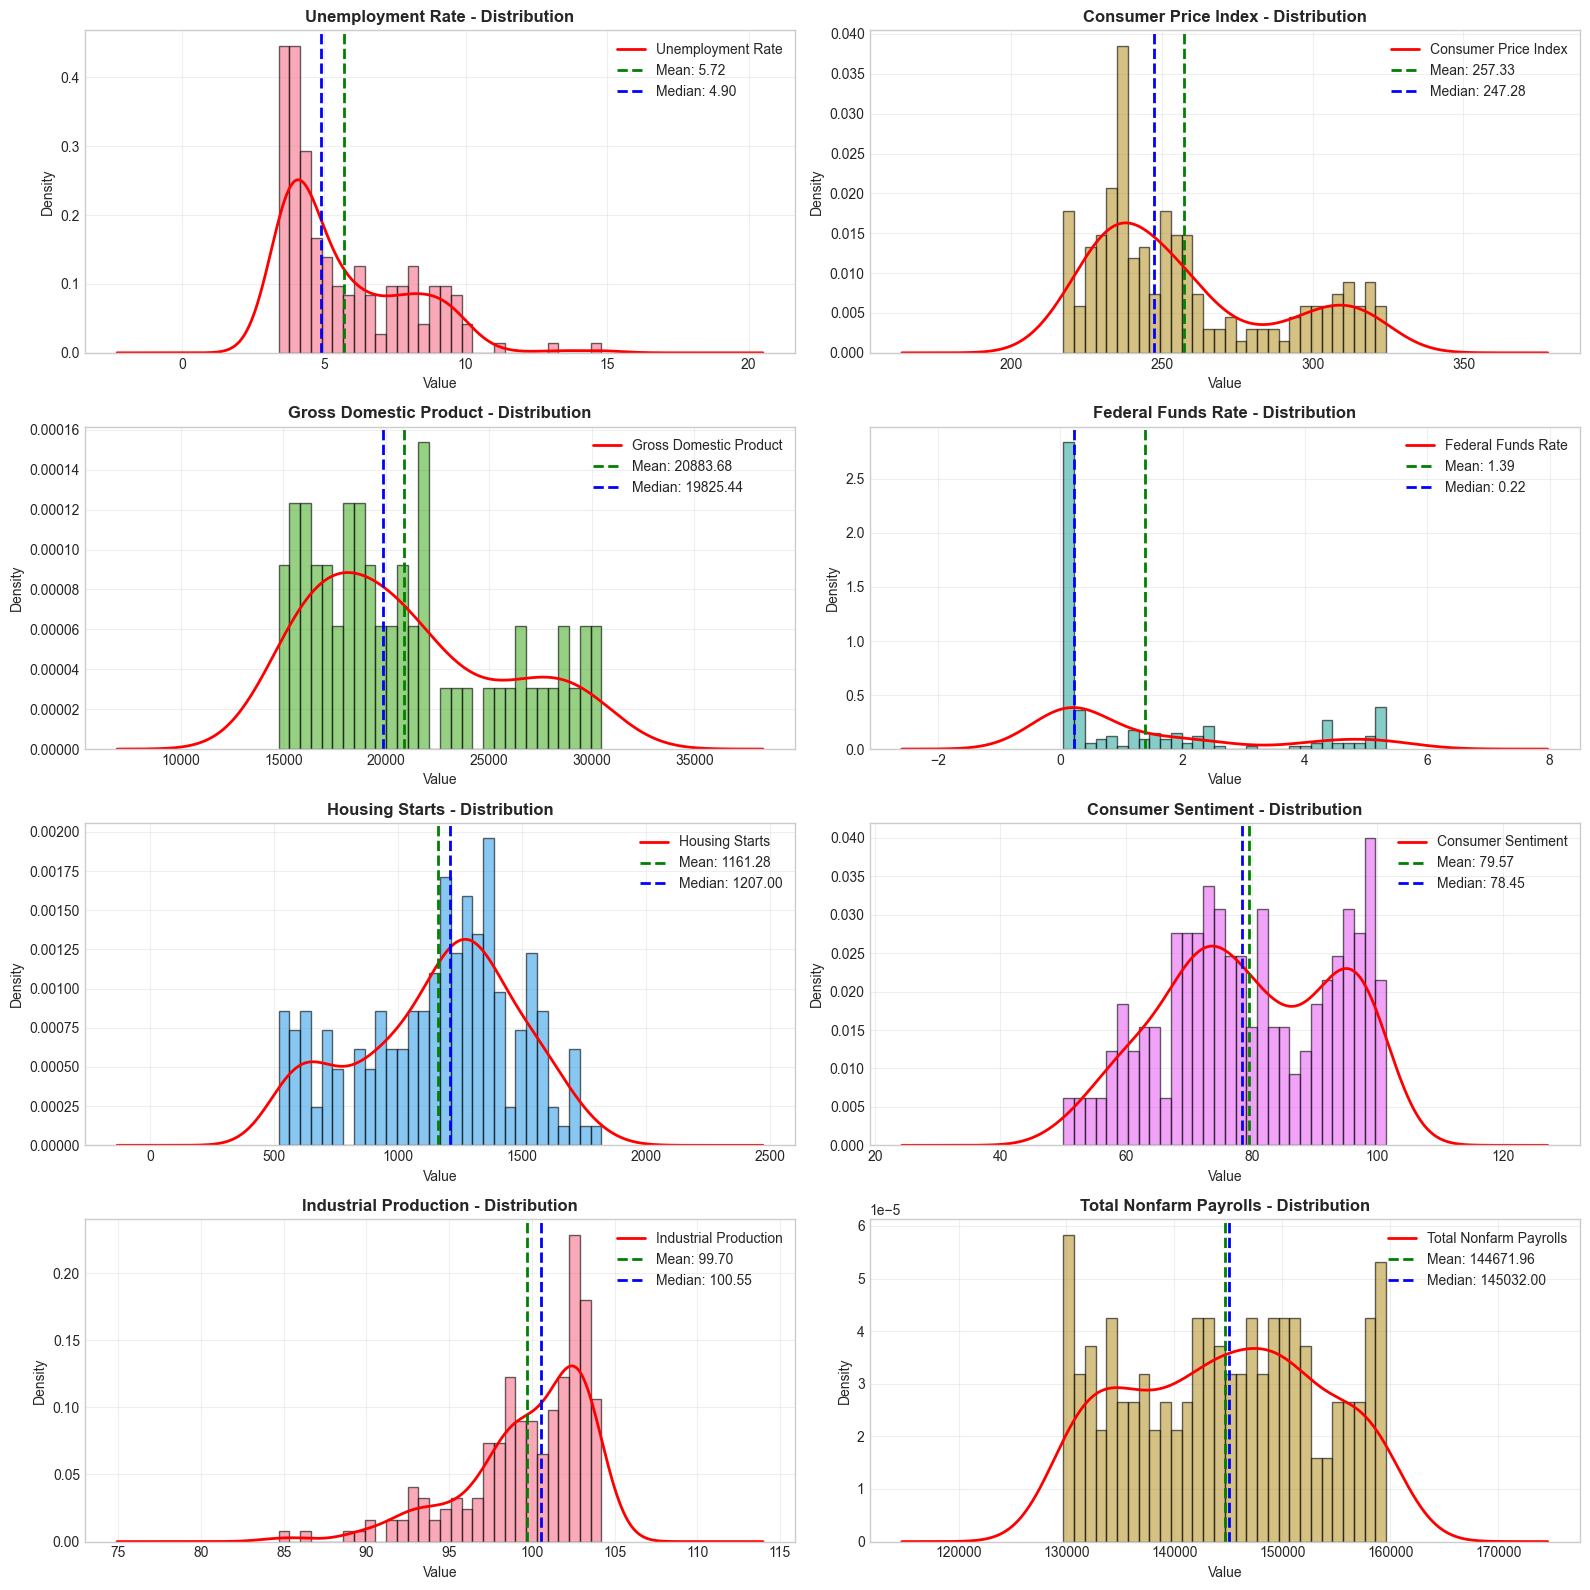

In [13]:
def analyze_distributions(df):
    """
    Analyze distribution of each indicator
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        # Histogram with KDE
        axes[idx].hist(df[col].dropna(), bins=30, alpha=0.6, 
                       color=f'C{idx}', edgecolor='black', density=True)
        
        # KDE overlay
        df[col].dropna().plot(kind='kde', ax=axes[idx], linewidth=2, color='red')
        
        axes[idx].set_title(f'{col} - Distribution', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Density')
        axes[idx].grid(True, alpha=0.3)
        
        # Add mean and median lines
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='green', linestyle='--', 
                          linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='blue', linestyle='--', 
                          linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

analyze_distributions(economic_data)


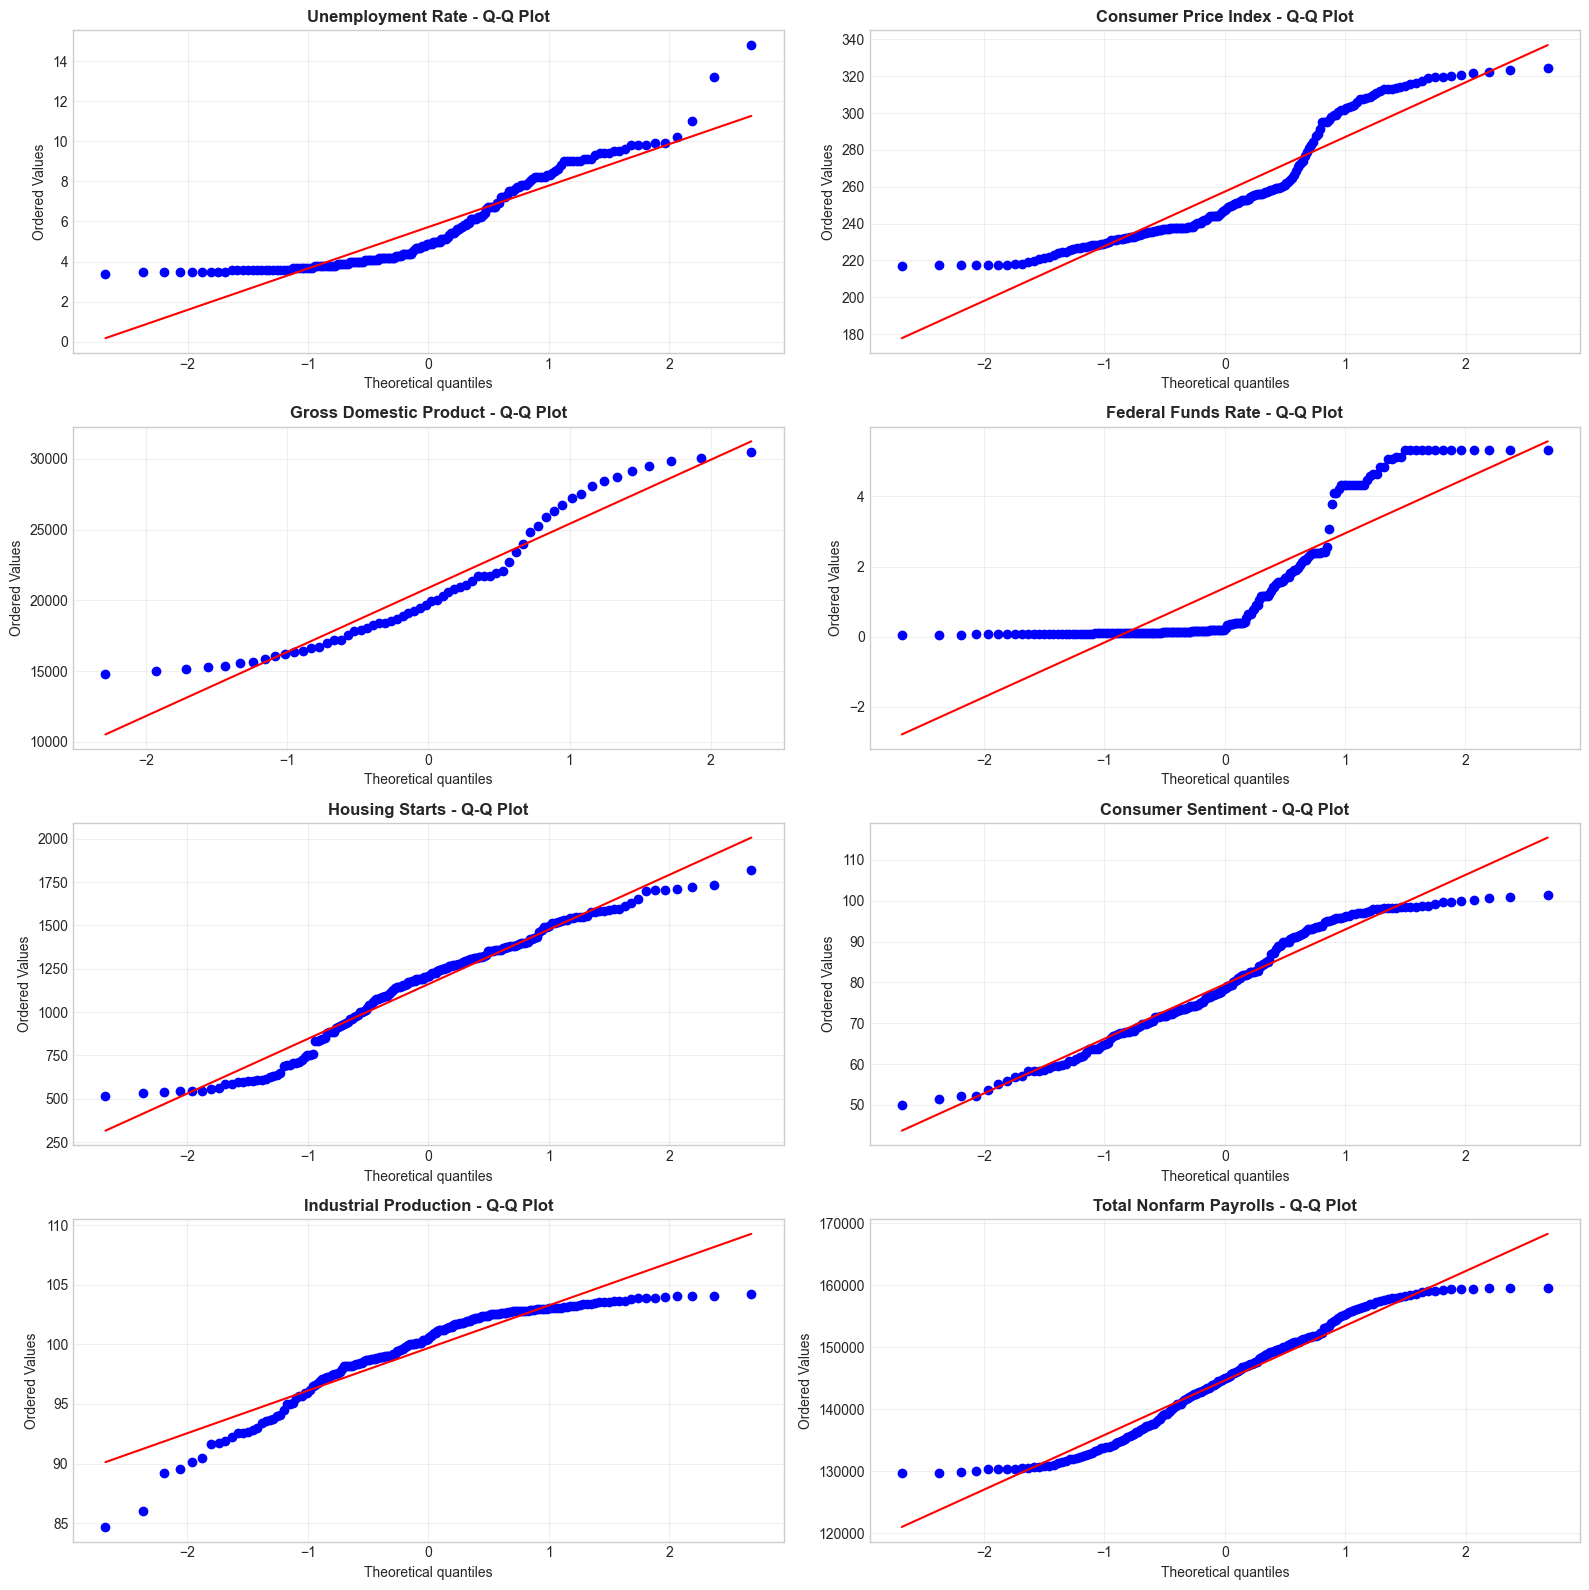

In [14]:
# Q-Q plots for normality check
def qq_plots(df):
    """
    Q-Q plots to check normality
    """
    n_cols = 2
    n_rows = (len(df.columns) + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    axes = axes.flatten()
    
    for idx, col in enumerate(df.columns):
        stats.probplot(df[col].dropna(), dist="norm", plot=axes[idx])
        axes[idx].set_title(f'{col} - Q-Q Plot', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
    
    # Remove empty subplots
    for idx in range(len(df.columns), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

qq_plots(economic_data)


# ============================================
# STEP 6: CORRELATION ANALYSIS
# ============================================


In [15]:
print("\n" + "="*60)
print("📊 STEP 6: CORRELATION ANALYSIS")
print("-"*60)



📊 STEP 6: CORRELATION ANALYSIS
------------------------------------------------------------



📊 Correlation Matrix:
                        Unemployment Rate  Consumer Price Index  \
Unemployment Rate                1.000000             -0.617887   
Consumer Price Index            -0.617887              1.000000   
Gross Domestic Product          -0.638233              0.994107   
Federal Funds Rate              -0.581337              0.848485   
Housing Starts                  -0.729308              0.737759   
Consumer Sentiment              -0.204076             -0.453605   
Industrial Production           -0.894549              0.585462   
Total Nonfarm Payrolls          -0.876966              0.897371   

                        Gross Domestic Product  Federal Funds Rate  \
Unemployment Rate                    -0.638233           -0.581337   
Consumer Price Index                  0.994107            0.848485   
Gross Domestic Product                1.000000            0.820852   
Federal Funds Rate                    0.820852            1.000000   
Housing Starts         

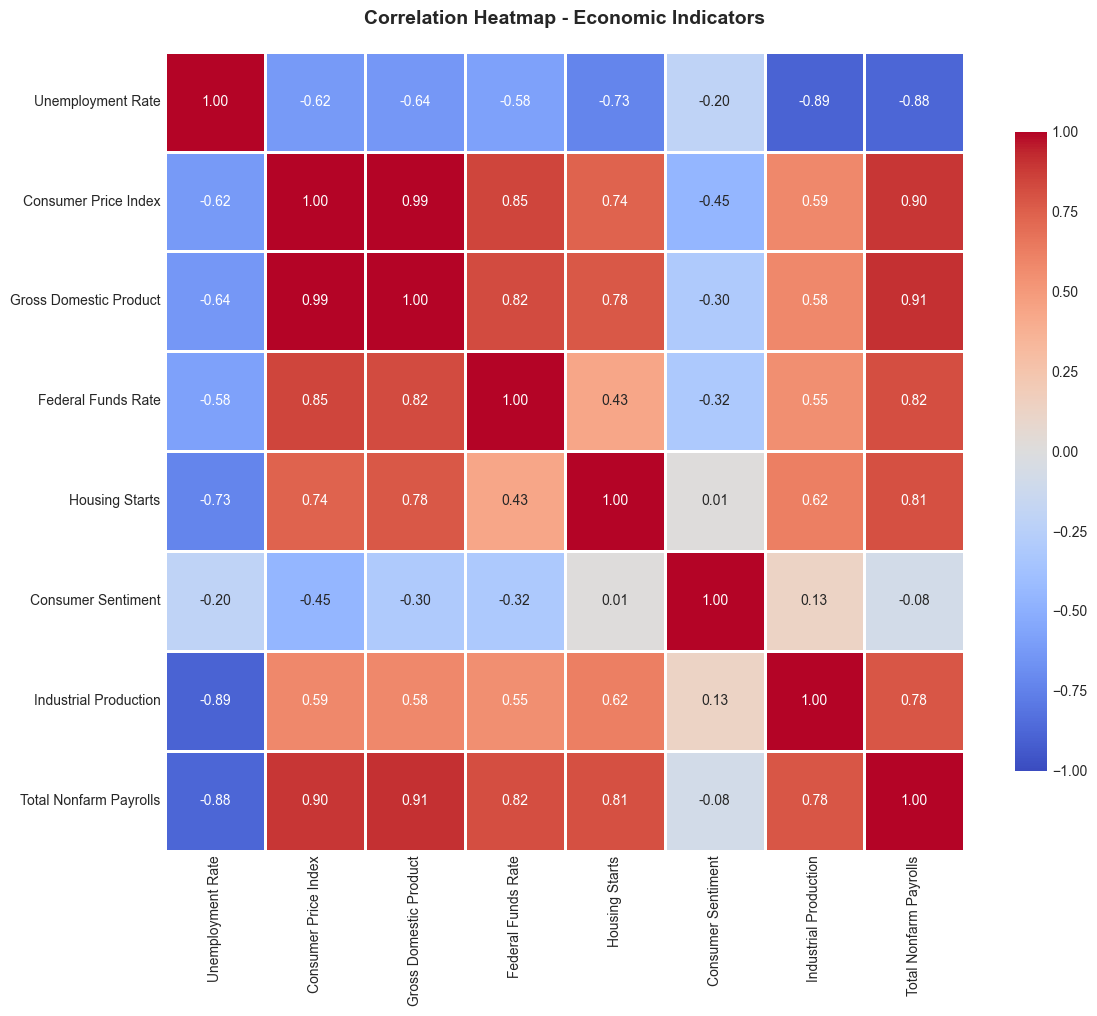


🔥 Strongest Positive Correlations:
Gross Domestic Product  Consumer Price Index      0.994107
Consumer Price Index    Gross Domestic Product    0.994107
Total Nonfarm Payrolls  Gross Domestic Product    0.913837
Gross Domestic Product  Total Nonfarm Payrolls    0.913837
Consumer Price Index    Total Nonfarm Payrolls    0.897371
Total Nonfarm Payrolls  Consumer Price Index      0.897371
Consumer Price Index    Federal Funds Rate        0.848485
Federal Funds Rate      Consumer Price Index      0.848485
                        Gross Domestic Product    0.820852
Gross Domestic Product  Federal Funds Rate        0.820852
dtype: float64

❄️  Strongest Negative Correlations:
Unemployment Rate       Consumer Price Index     -0.617887
Consumer Price Index    Unemployment Rate        -0.617887
Unemployment Rate       Gross Domestic Product   -0.638233
Gross Domestic Product  Unemployment Rate        -0.638233
Unemployment Rate       Housing Starts           -0.729308
Housing Starts          Un

In [16]:
def correlation_analysis(df):
    """
    Comprehensive correlation analysis
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    print("\n📊 Correlation Matrix:")
    print(corr_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                fmt='.2f', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap - Economic Indicators', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find strongest correlations
    print("\n🔥 Strongest Positive Correlations:")
    corr_pairs = corr_matrix.unstack()
    corr_pairs = corr_pairs[corr_pairs < 1.0].sort_values(ascending=False)
    print(corr_pairs.head(10))
    
    print("\n❄️  Strongest Negative Correlations:")
    print(corr_pairs.tail(10))
    
    return corr_matrix

corr_matrix = correlation_analysis(economic_data)


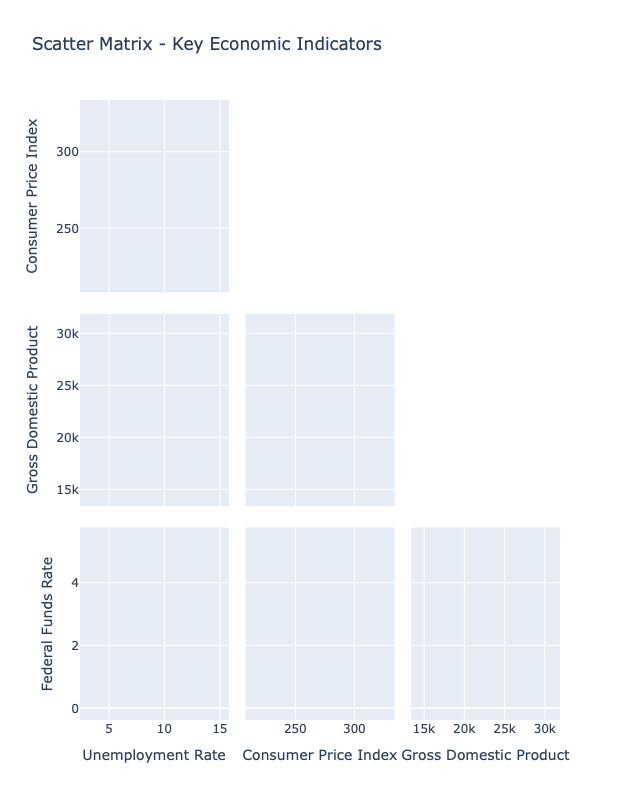

In [17]:
# Scatter plots for key relationships
def scatter_matrix_plot(df):
    """
    Create scatter plot matrix
    """
    # Select subset of columns for readability (adjust as needed)
    cols_to_plot = df.columns[:4]  # First 4 indicators
    
    fig = px.scatter_matrix(
        df[cols_to_plot],
        dimensions=cols_to_plot,
        title='Scatter Matrix - Key Economic Indicators',
        height=800
    )
    fig.update_traces(diagonal_visible=False, showupperhalf=False)
    fig.show()

scatter_matrix_plot(economic_data)


# ============================================
# STEP 7: TREND ANALYSIS
# ============================================


In [18]:
print("\n" + "="*60)
print("📊 STEP 7: TREND ANALYSIS")
print("-"*60)



📊 STEP 7: TREND ANALYSIS
------------------------------------------------------------


In [19]:
def analyze_trends(df, column):
    """
    Analyze trends with moving averages
    """
    plt.figure(figsize=(14, 8))
    
    # Original data
    plt.plot(df.index, df[column], label='Original', linewidth=1.5, alpha=0.7)
    
    # Moving averages
    ma_3m = df[column].rolling(window=3).mean()
    ma_6m = df[column].rolling(window=6).mean()
    ma_12m = df[column].rolling(window=12).mean()
    
    plt.plot(df.index, ma_3m, label='3-Month MA', linewidth=2)
    plt.plot(df.index, ma_6m, label='6-Month MA', linewidth=2)
    plt.plot(df.index, ma_12m, label='12-Month MA', linewidth=2)
    
    plt.title(f'{column} - Trend Analysis with Moving Averages', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    # Calculate rate of change
    df[f'{column}_pct_change'] = df[column].pct_change() * 100
    
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[f'{column}_pct_change'], linewidth=1.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{column} - Percentage Change Over Time', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


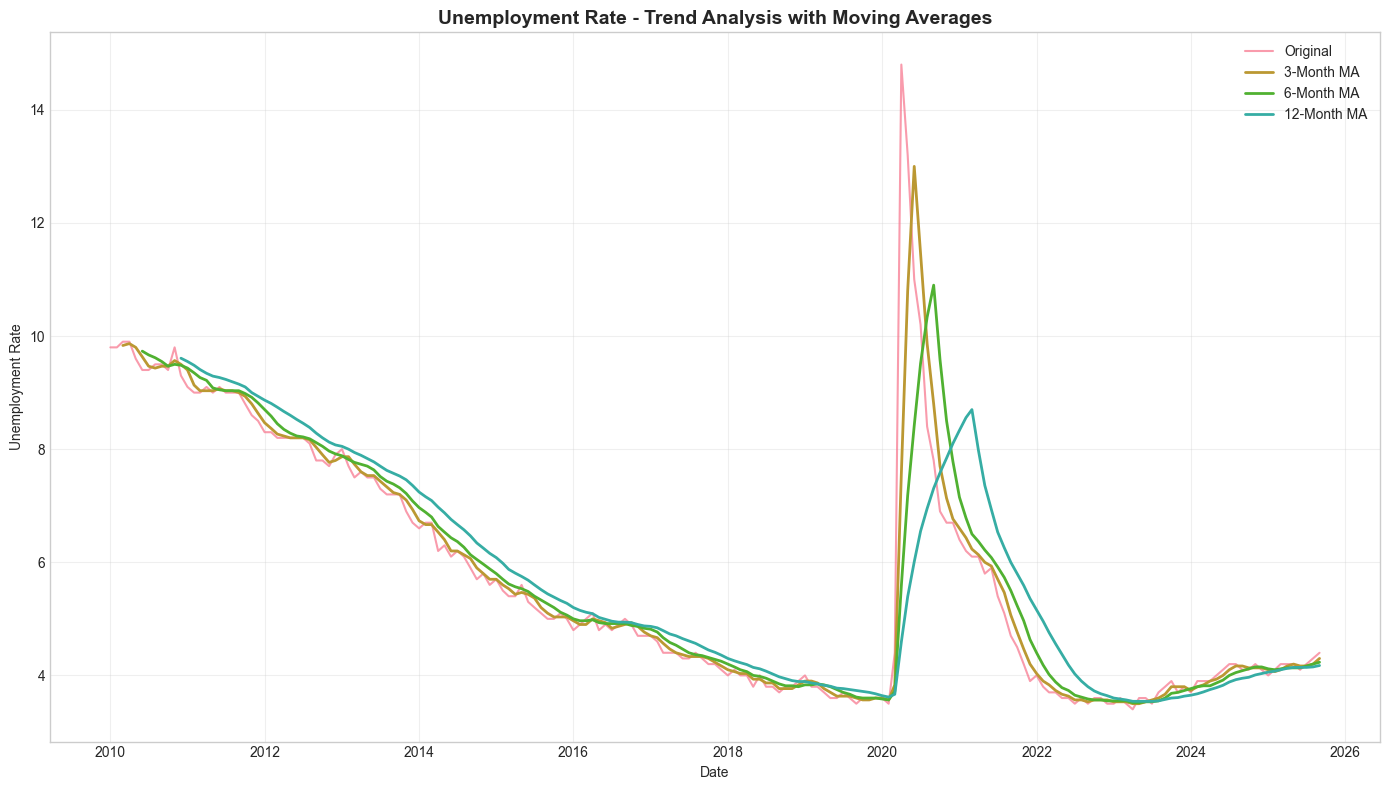

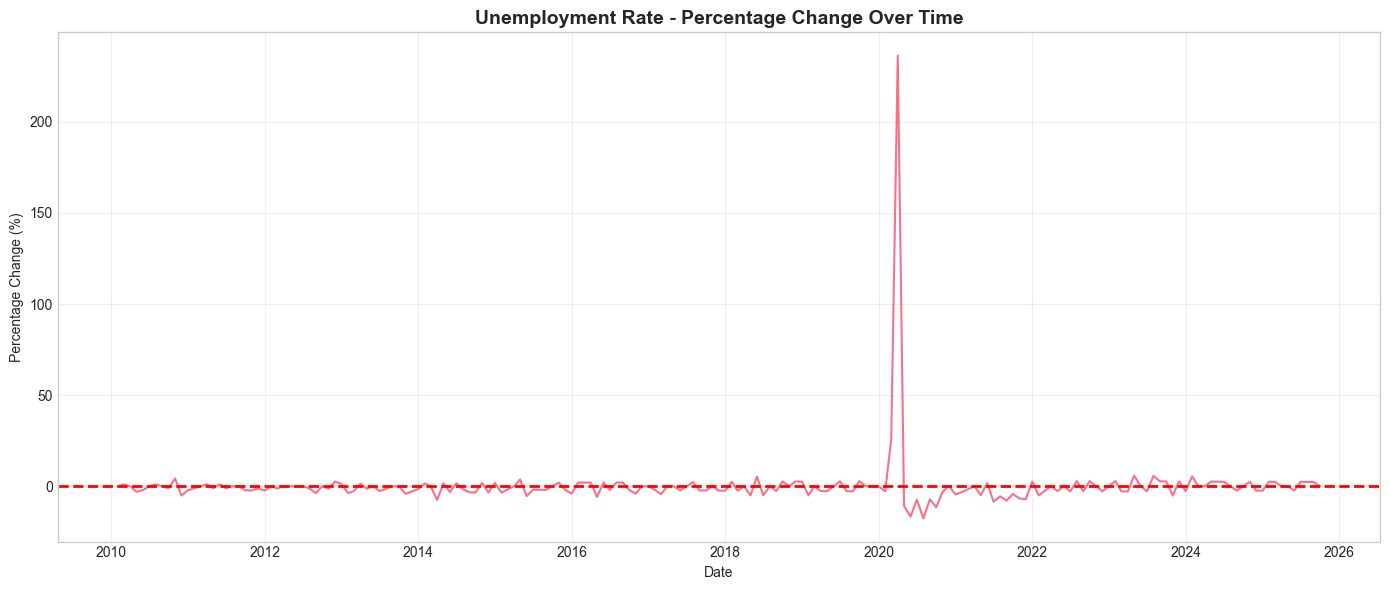

In [20]:
# Example: Analyze unemployment rate trends
if 'Unemployment Rate' in economic_data.columns:
    analyze_trends(economic_data, 'Unemployment Rate')


# ============================================
# STEP 8: SEASONALITY & DECOMPOSITION
# ============================================


In [21]:
print("\n" + "="*60)
print("📊 STEP 8: SEASONALITY & DECOMPOSITION")
print("-"*60)

def decompose_time_series(df, column, freq=12):
    """
    Decompose time series into trend, seasonal, and residual components
    """
    # Remove missing values
    series = df[column].dropna()
    
    # Perform decomposition
    decomposition = seasonal_decompose(series, model='additive', period=freq)
    
    # Plot
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    
    decomposition.observed.plot(ax=axes[0], title='Original', color='blue')
    axes[0].set_ylabel('Observed')
    axes[0].grid(True, alpha=0.3)
    
    decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
    axes[1].set_ylabel('Trend')
    axes[1].grid(True, alpha=0.3)
    
    decomposition.seasonal.plot(ax=axes[2], title='Seasonality', color='orange')
    axes[2].set_ylabel('Seasonal')
    axes[2].grid(True, alpha=0.3)
    
    decomposition.resid.plot(ax=axes[3], title='Residuals', color='red')
    axes[3].set_ylabel('Residual')
    axes[3].grid(True, alpha=0.3)
    
    plt.suptitle(f'Time Series Decomposition - {column}', 
                 fontsize=16, fontweight='bold', y=1.001)
    plt.tight_layout()
    plt.show()
    
    return decomposition



📊 STEP 8: SEASONALITY & DECOMPOSITION
------------------------------------------------------------


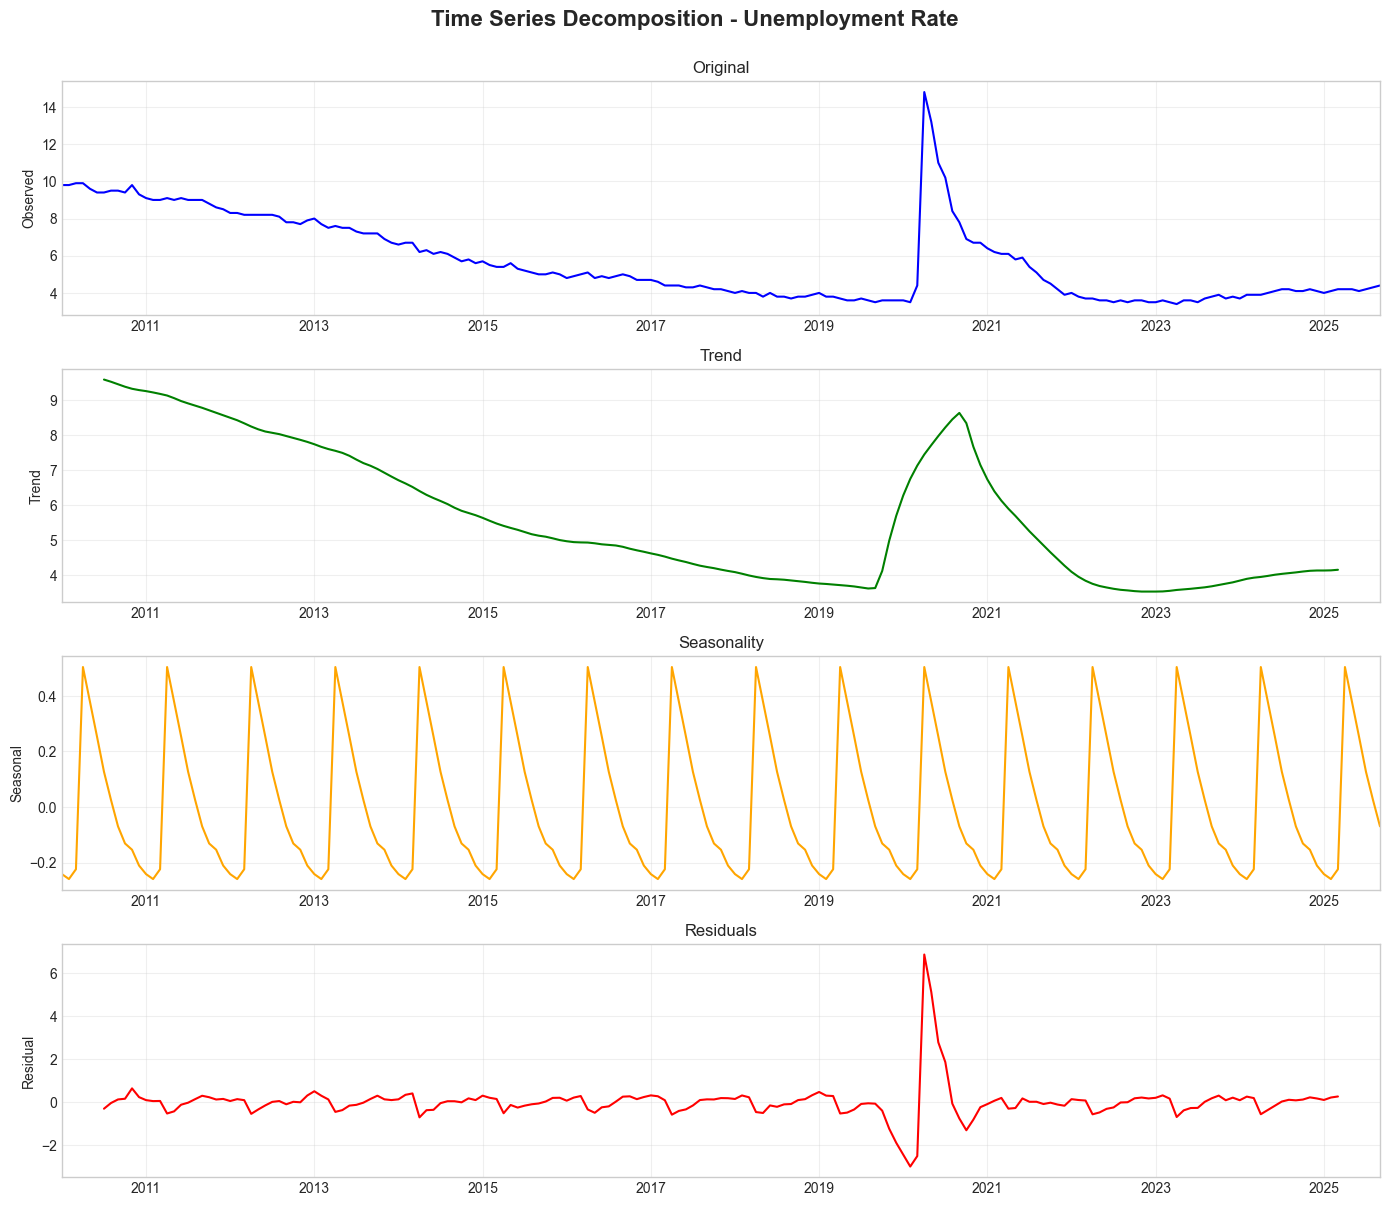

In [22]:
# Example: Decompose unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    decomp = decompose_time_series(economic_data, 'Unemployment Rate')


# ============================================
# STEP 9: STATIONARITY TESTING
# ============================================


In [23]:
print("\n" + "="*60)
print("📊 STEP 9: STATIONARITY TESTING (ADF Test)")
print("-"*60)

def test_stationarity(df, column):
    """
    Augmented Dickey-Fuller test for stationarity
    """
    series = df[column].dropna()
    
    # Perform ADF test
    result = adfuller(series)
    
    print(f"\n🔬 ADF Test Results for {column}:")
    print(f"   ADF Statistic: {result[0]:.6f}")
    print(f"   p-value: {result[1]:.6f}")
    print(f"   Critical Values:")
    for key, value in result[4].items():
        print(f"      {key}: {value:.3f}")
    
    # Interpretation
    if result[1] < 0.05:
        print(f"   ✅ STATIONARY (p < 0.05)")
        print(f"   → The series does not have a unit root")
    else:
        print(f"   ❌ NON-STATIONARY (p >= 0.05)")
        print(f"   → The series has a unit root, consider differencing")
            # Plot rolling statistics
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Original series
    axes[0].plot(series.index, series, label='Original', color='blue')
    axes[0].plot(series.index, series.rolling(window=12).mean(), 
                 label='Rolling Mean', color='red', linewidth=2)
    axes[0].plot(series.index, series.rolling(window=12).std(), 
                 label='Rolling Std', color='green', linewidth=2)
    axes[0].set_title(f'{column} - Rolling Statistics', fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # First difference (if non-stationary)
    if result[1] >= 0.05:
        diff_series = series.diff().dropna()
        axes[1].plot(diff_series.index, diff_series, label='First Difference', color='purple')
        axes[1].plot(diff_series.index, diff_series.rolling(window=12).mean(), 
                     label='Rolling Mean', color='red', linewidth=2)
        axes[1].set_title(f'{column} - First Difference', fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Test differenced series
        diff_result = adfuller(diff_series)
        print(f"\n   After First Differencing:")
        print(f"   p-value: {diff_result[1]:.6f}")
        if diff_result[1] < 0.05:
            print(f"   ✅ NOW STATIONARY")
    
    plt.tight_layout()
    plt.show()
    
    return result




📊 STEP 9: STATIONARITY TESTING (ADF Test)
------------------------------------------------------------



🔬 ADF Test Results for Unemployment Rate:
   ADF Statistic: -2.886500
   p-value: 0.046940
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ✅ STATIONARY (p < 0.05)
   → The series does not have a unit root


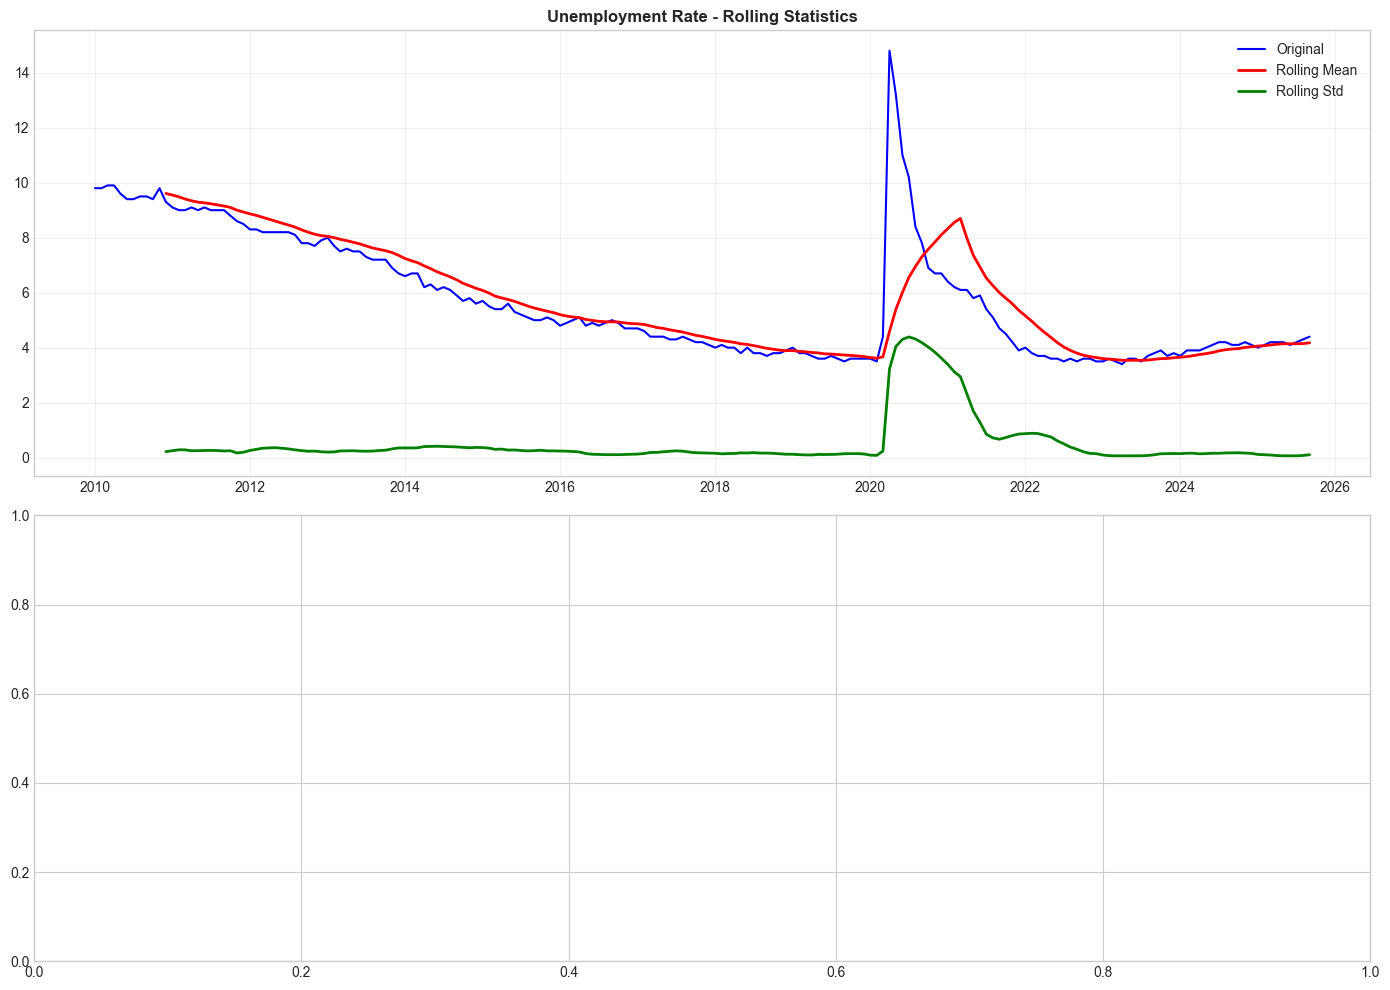


🔬 ADF Test Results for Consumer Price Index:
   ADF Statistic: 0.561516
   p-value: 0.986628
   Critical Values:
      1%: -3.468
      5%: -2.878
      10%: -2.576
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.284781


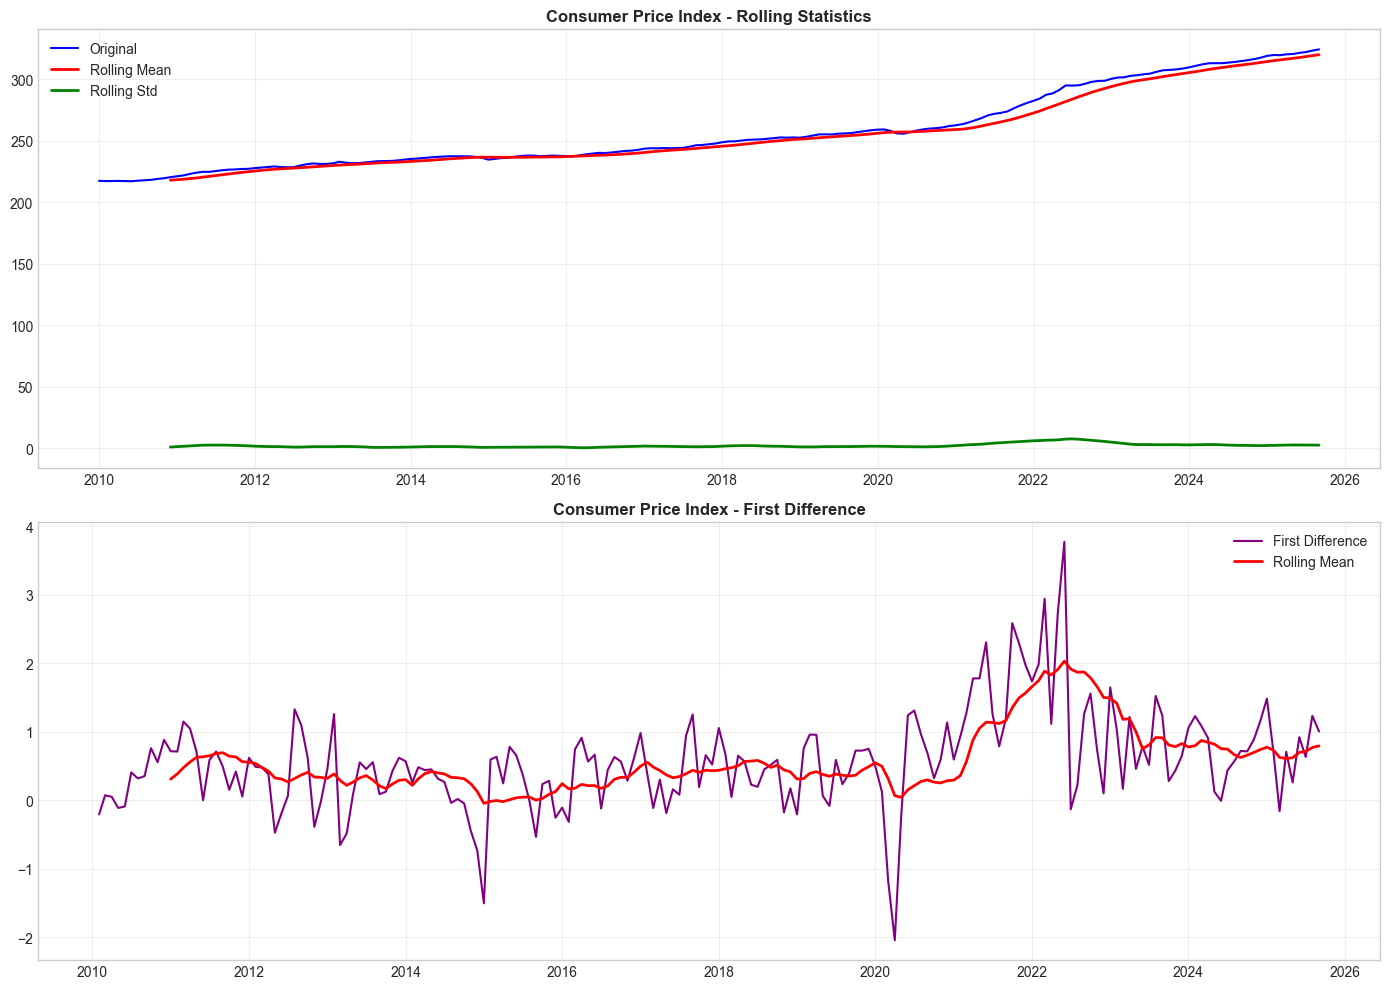


🔬 ADF Test Results for Gross Domestic Product:
   ADF Statistic: 1.873229
   p-value: 0.998484
   Critical Values:
      1%: -3.542
      5%: -2.910
      10%: -2.593
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.000000
   ✅ NOW STATIONARY


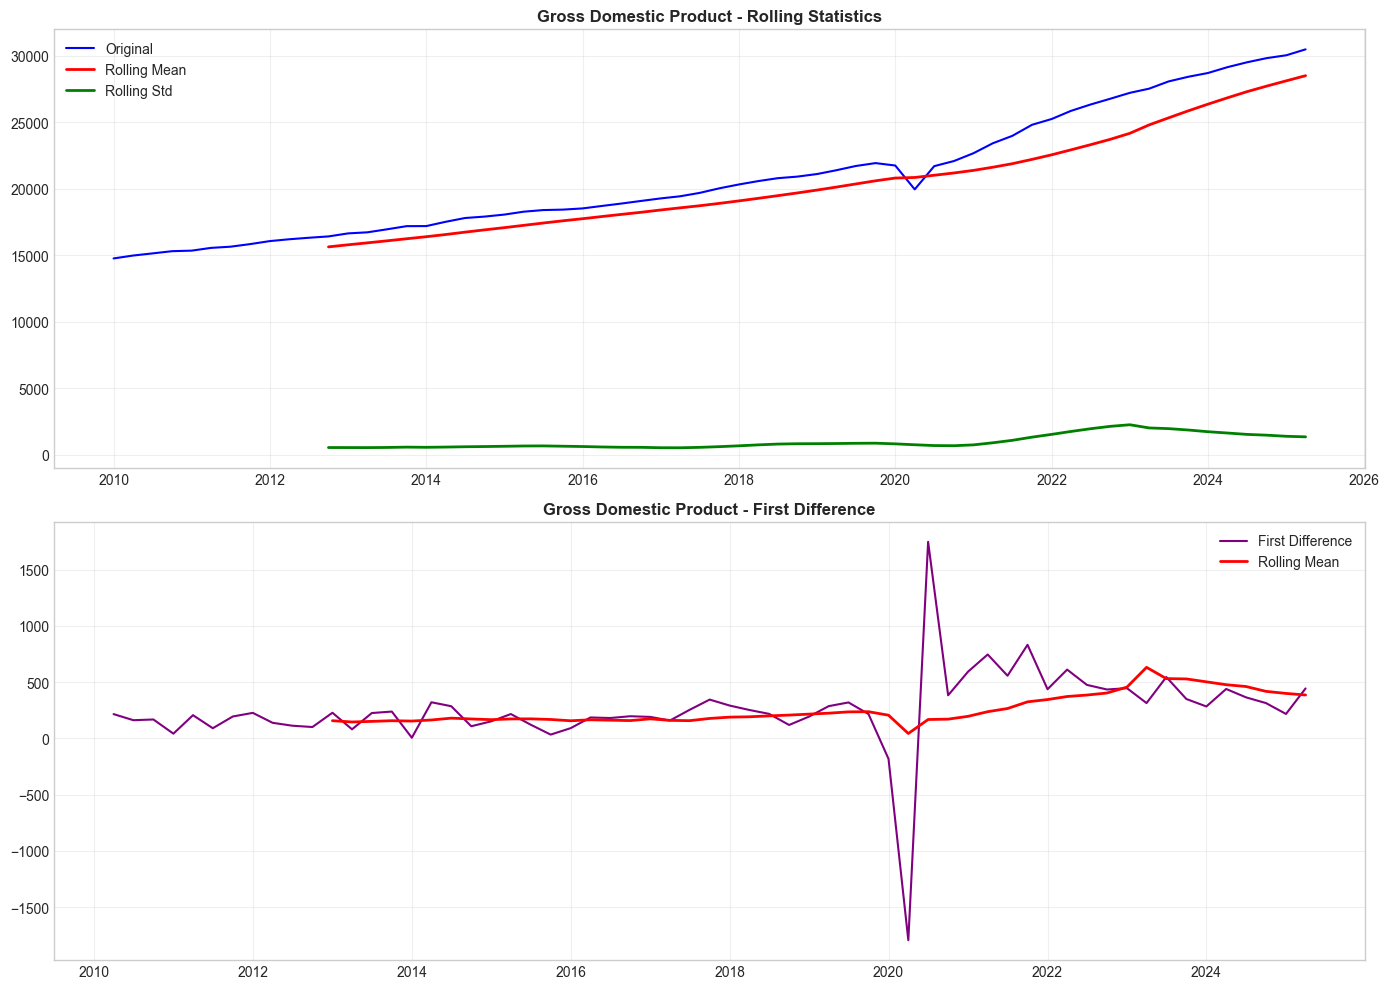


🔬 ADF Test Results for Federal Funds Rate:
   ADF Statistic: -2.029448
   p-value: 0.273812
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.042410
   ✅ NOW STATIONARY


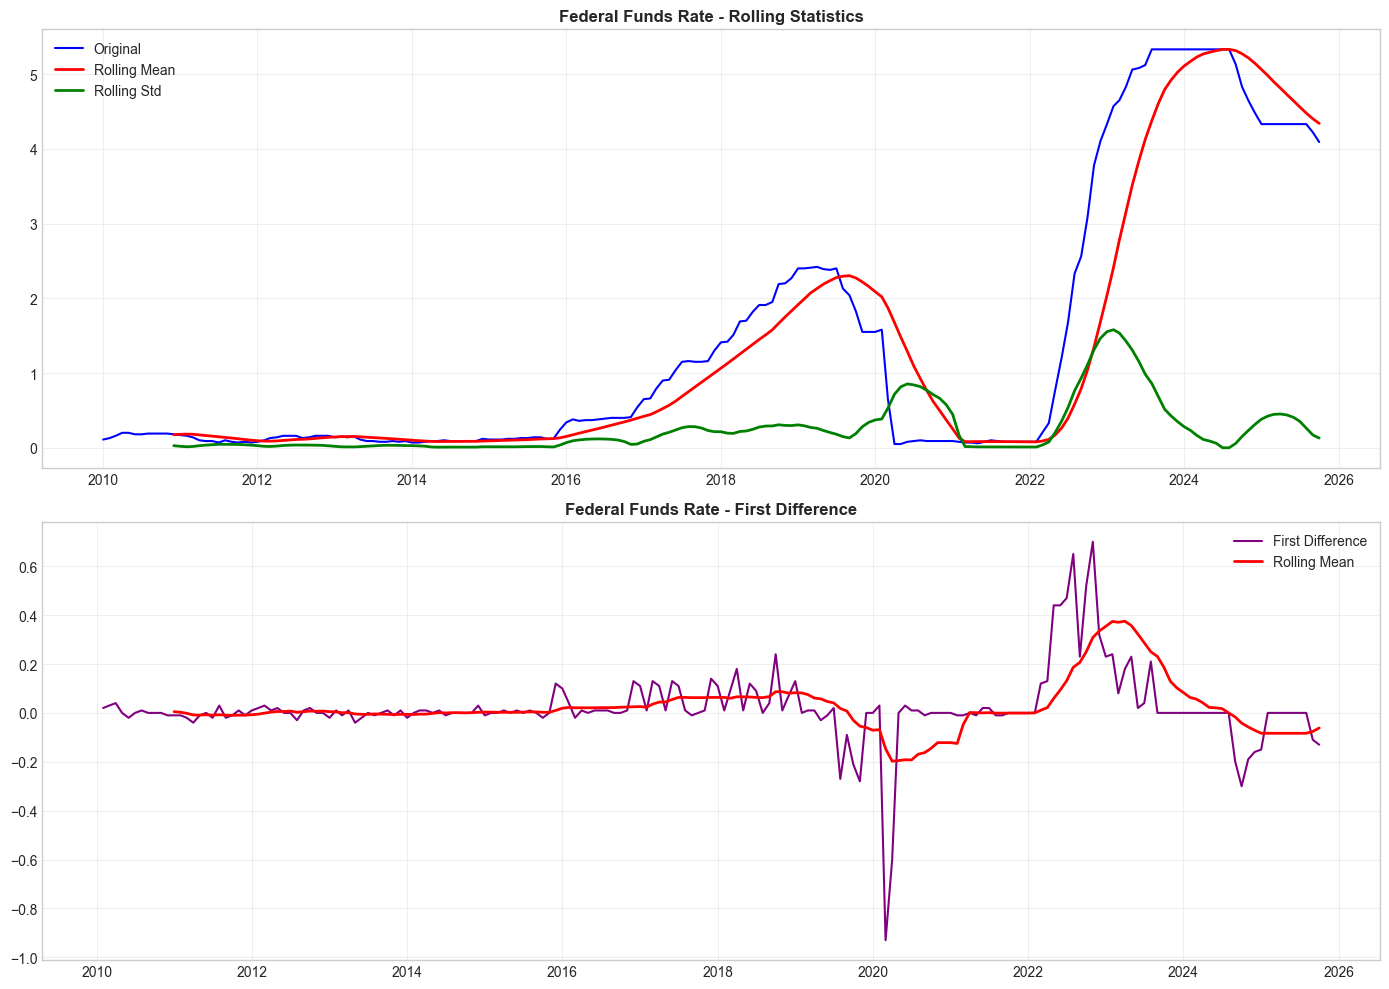


🔬 ADF Test Results for Housing Starts:
   ADF Statistic: -1.846466
   p-value: 0.357649
   Critical Values:
      1%: -3.467
      5%: -2.878
      10%: -2.575
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.000000
   ✅ NOW STATIONARY


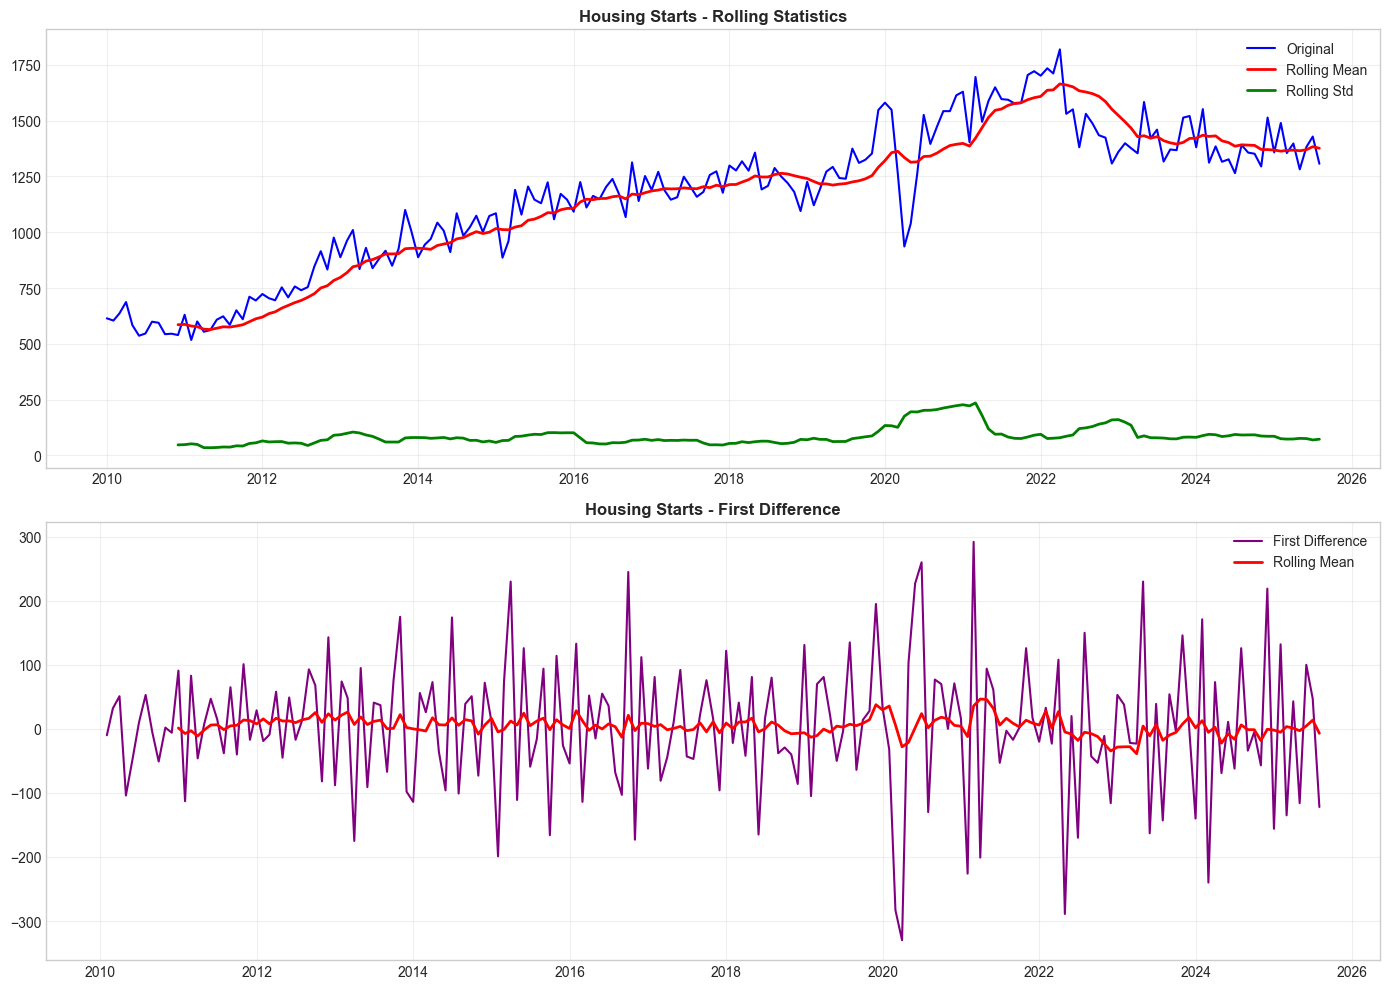


🔬 ADF Test Results for Consumer Sentiment:
   ADF Statistic: -0.720753
   p-value: 0.841301
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.000000
   ✅ NOW STATIONARY


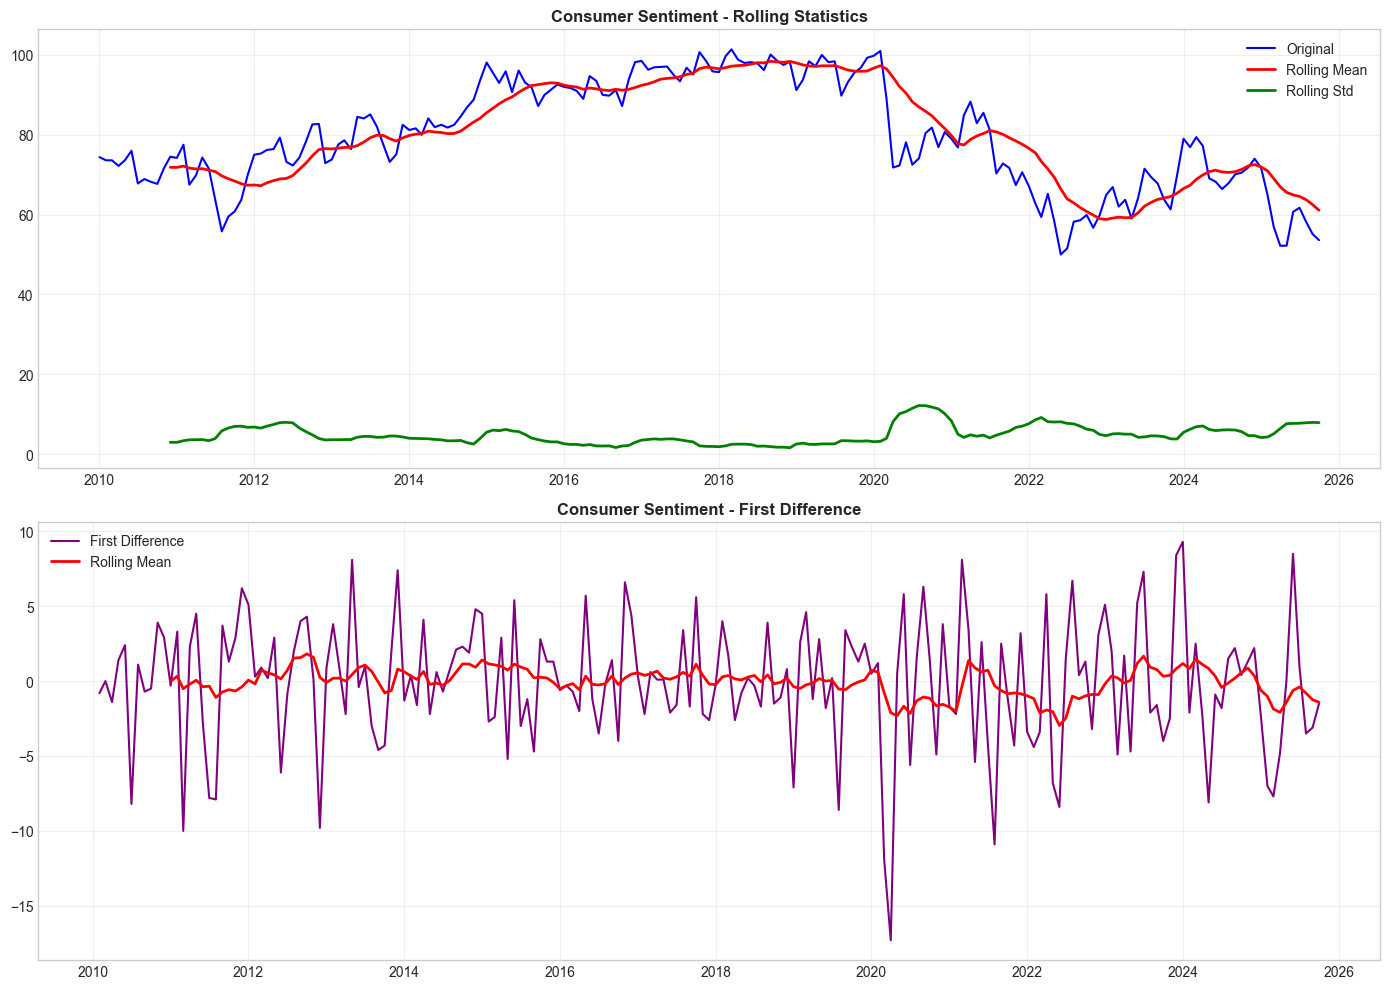


🔬 ADF Test Results for Industrial Production:
   ADF Statistic: -2.920193
   p-value: 0.043050
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ✅ STATIONARY (p < 0.05)
   → The series does not have a unit root


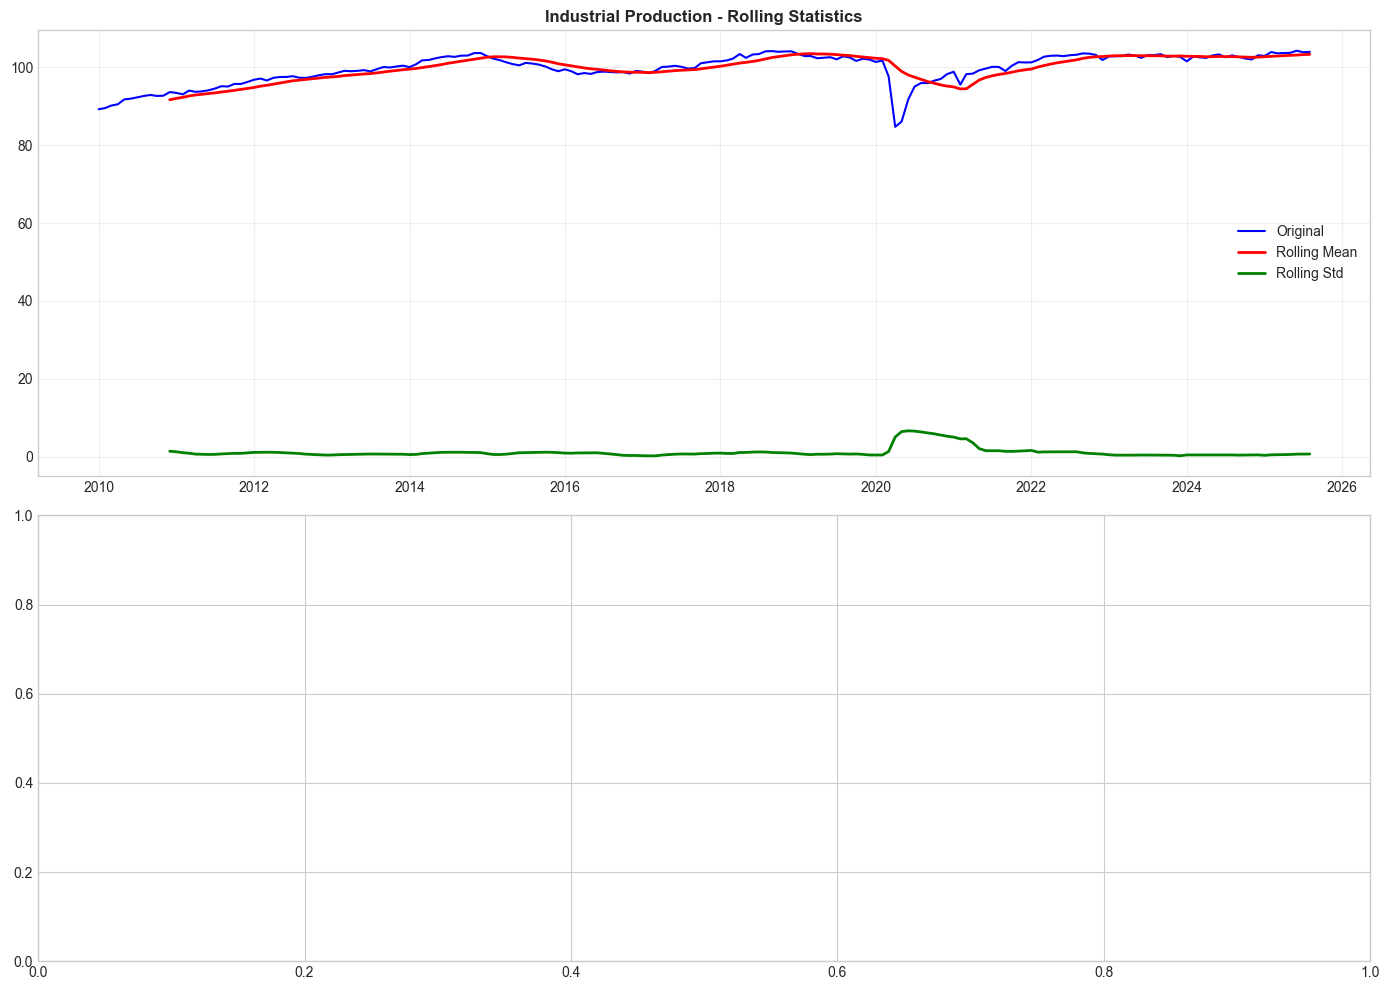


🔬 ADF Test Results for Total Nonfarm Payrolls:
   ADF Statistic: -1.047755
   p-value: 0.735451
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ❌ NON-STATIONARY (p >= 0.05)
   → The series has a unit root, consider differencing

   After First Differencing:
   p-value: 0.000000
   ✅ NOW STATIONARY


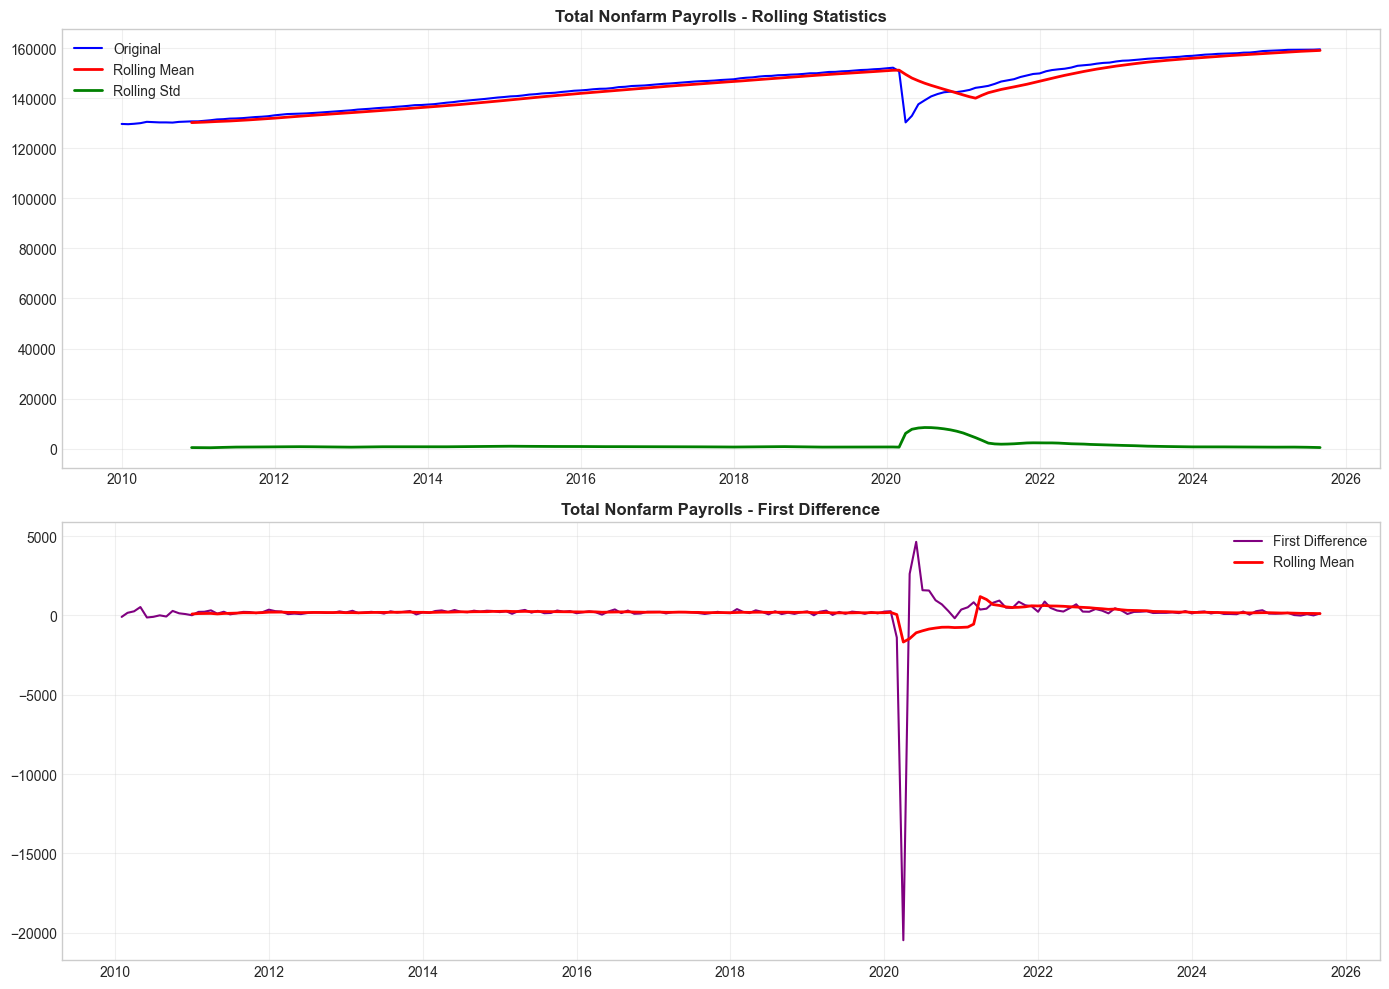


🔬 ADF Test Results for Unemployment Rate_pct_change:
   ADF Statistic: -12.712303
   p-value: 0.000000
   Critical Values:
      1%: -3.466
      5%: -2.877
      10%: -2.575
   ✅ STATIONARY (p < 0.05)
   → The series does not have a unit root


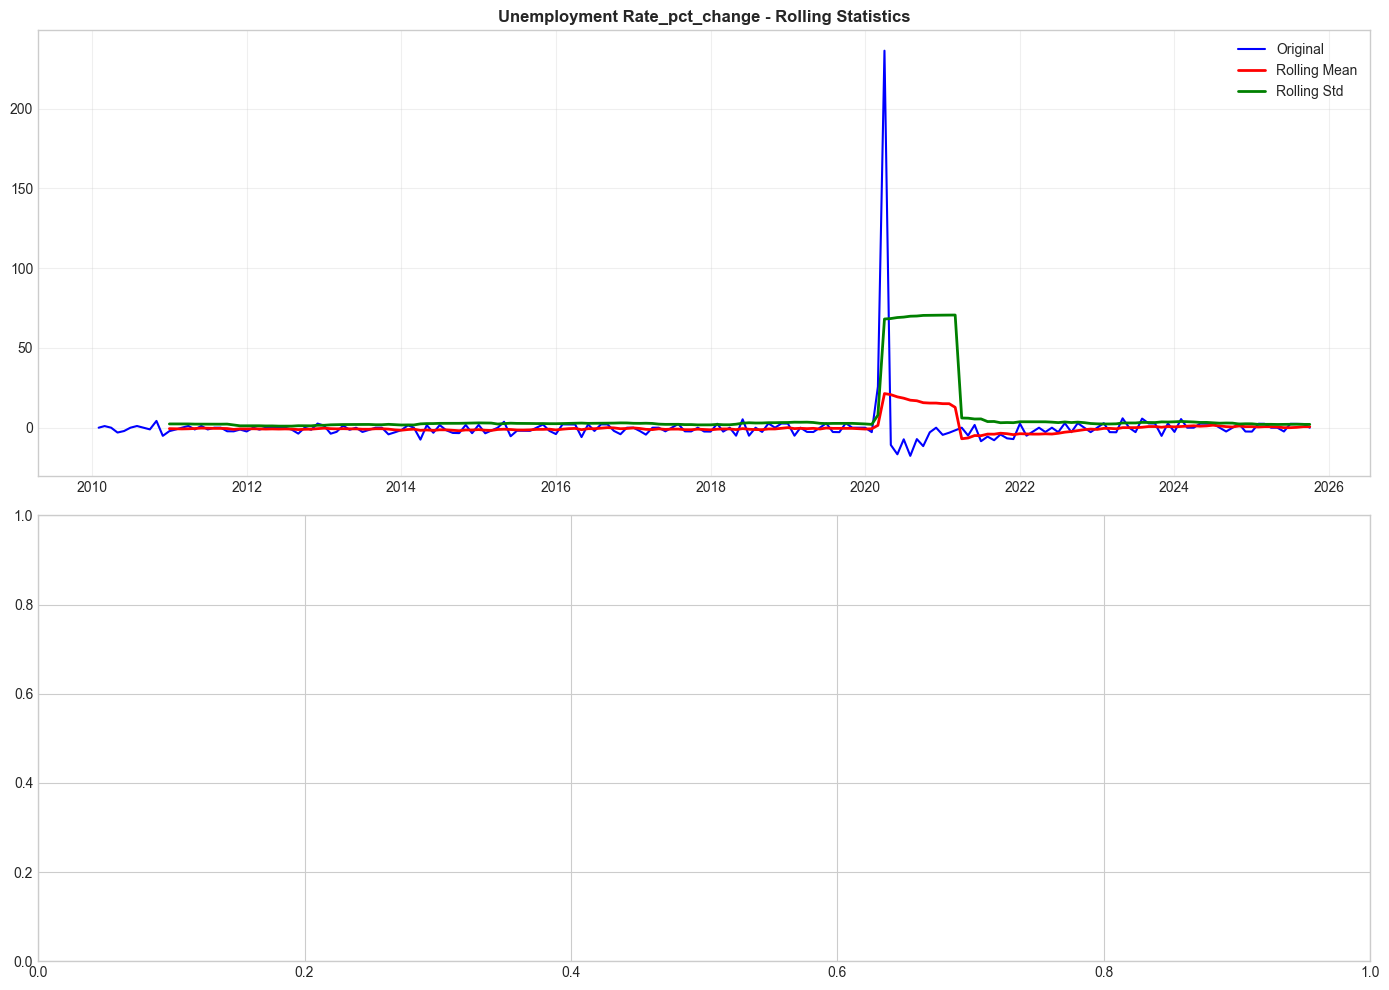

In [24]:
# Test all indicators
stationarity_results = {}
for col in economic_data.columns:
    stationarity_results[col] = test_stationarity(economic_data, col)


# ============================================
# STEP 10: AUTOCORRELATION ANALYSIS
# ============================================


In [25]:
print("\n" + "="*60)
print("📊 STEP 10: AUTOCORRELATION ANALYSIS")
print("-"*60)

def plot_acf_pacf(df, column, lags=40):
    """
    Plot ACF and PACF for time series
    """
    series = df[column].dropna()
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # ACF
    plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title(f'Autocorrelation Function (ACF) - {column}', 
                      fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # PACF
    plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) - {column}', 
                      fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()



📊 STEP 10: AUTOCORRELATION ANALYSIS
------------------------------------------------------------


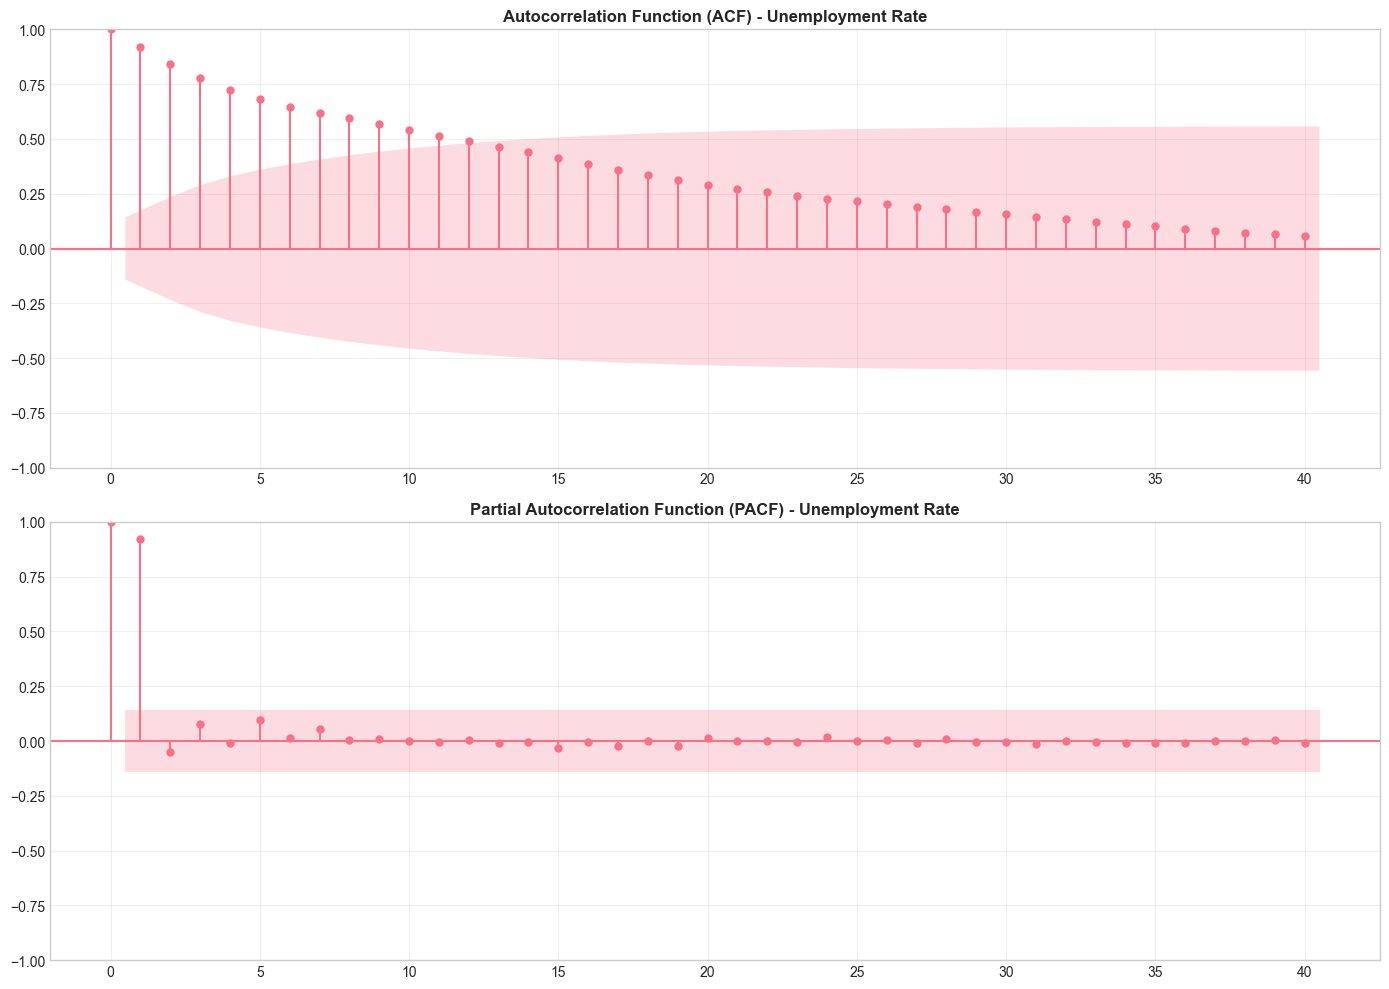

In [26]:
# Example: ACF/PACF for unemployment rate
if 'Unemployment Rate' in economic_data.columns:
    plot_acf_pacf(economic_data, 'Unemployment Rate')


# ============================================
# STEP 11: OUTLIER DETECTION
# ============================================


In [27]:
print("\n" + "="*60)
print("📊 STEP 11: OUTLIER DETECTION")
print("-"*60)

def detect_outliers(df, column):
    """
    Detect outliers using IQR method and Z-score
    """
    series = df[column].dropna()
    
    # IQR method
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_iqr = series[(series < lower_bound) | (series > upper_bound)]
    
    # Z-score method
    z_scores = np.abs(stats.zscore(series))
    outliers_z = series[z_scores > 3]
    
    print(f"\n📊 Outlier Analysis for {column}:")
    print(f"   IQR Method: {len(outliers_iqr)} outliers detected")
    print(f"   Z-score Method (|z| > 3): {len(outliers_z)} outliers detected")
    
    if len(outliers_iqr) > 0:
        print(f"\n   Outlier dates (IQR):")
        for date, value in outliers_iqr.items():
            print(f"      {date.date()}: {value:.2f}")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    axes[0].boxplot(series, vert=True)
    axes[0].set_title(f'{column} - Box Plot', fontweight='bold')
    axes[0].set_ylabel('Value')
    axes[0].grid(True, alpha=0.3)
    
    # Time series with outliers highlighted
    axes[1].plot(series.index, series, label='Data', linewidth=1.5)
    axes[1].scatter(outliers_iqr.index, outliers_iqr.values, 
                    color='red', s=100, label='Outliers (IQR)', zorder=5)
    axes[1].axhline(y=upper_bound, color='orange', linestyle='--', 
                    linewidth=2, label='Upper Bound')
    axes[1].axhline(y=lower_bound, color='orange', linestyle='--', 
                    linewidth=2, label='Lower Bound')
    axes[1].set_title(f'{column} - Outliers Over Time', fontweight='bold')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return outliers_iqr, outliers_z



📊 STEP 11: OUTLIER DETECTION
------------------------------------------------------------



📊 Outlier Analysis for Unemployment Rate:
   IQR Method: 2 outliers detected
   Z-score Method (|z| > 3): 2 outliers detected

   Outlier dates (IQR):
      2020-04-01: 14.80
      2020-05-01: 13.20


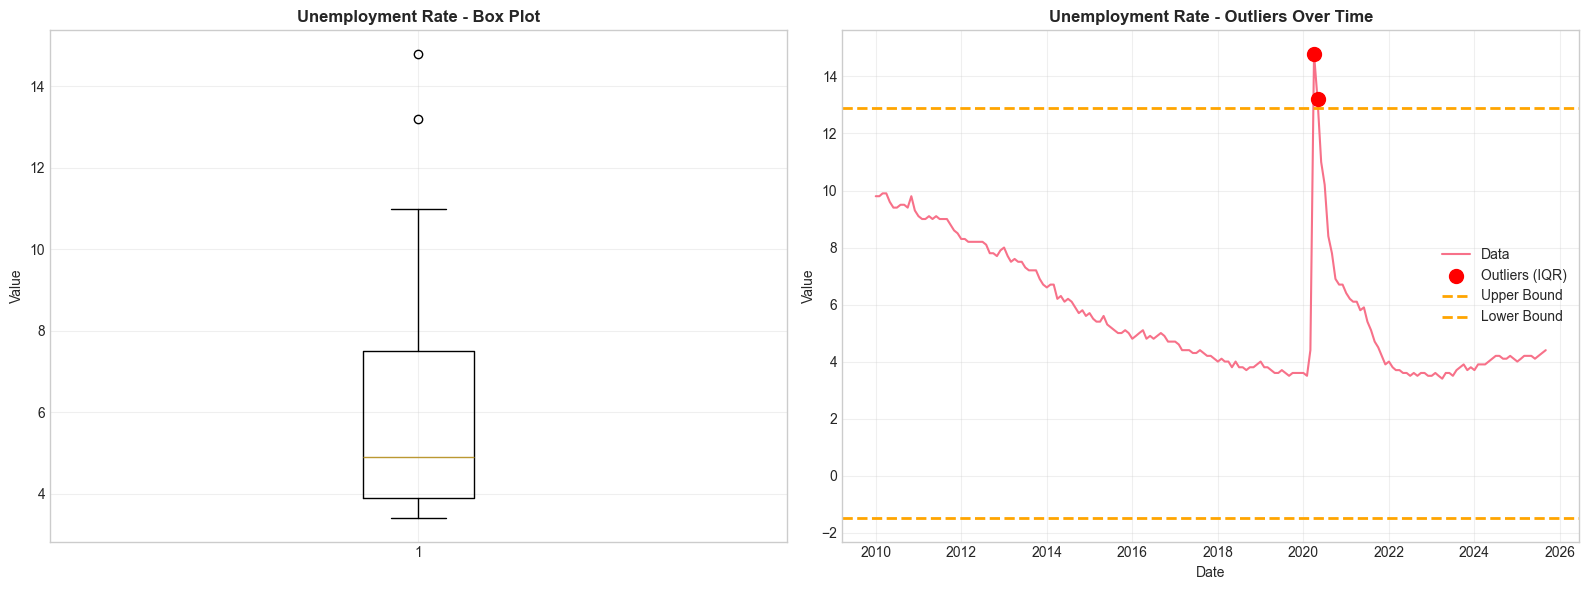


📊 Outlier Analysis for Consumer Price Index:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


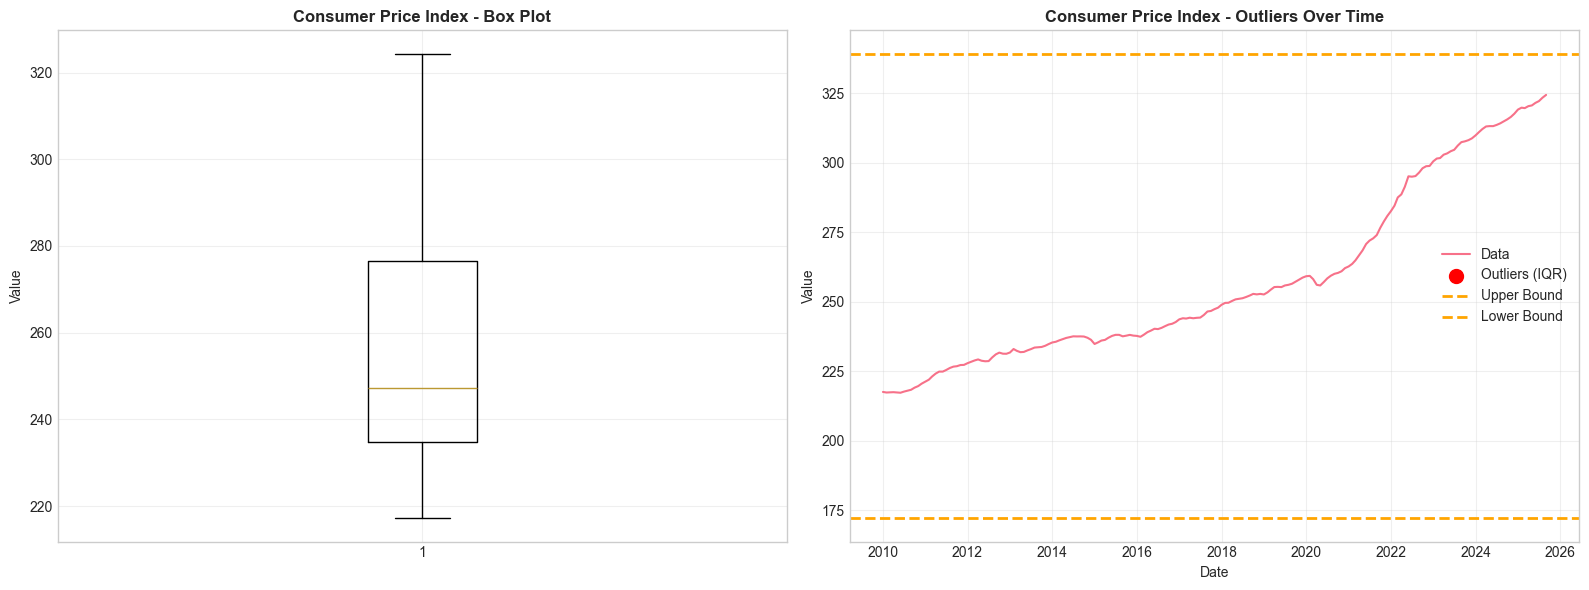


📊 Outlier Analysis for Gross Domestic Product:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


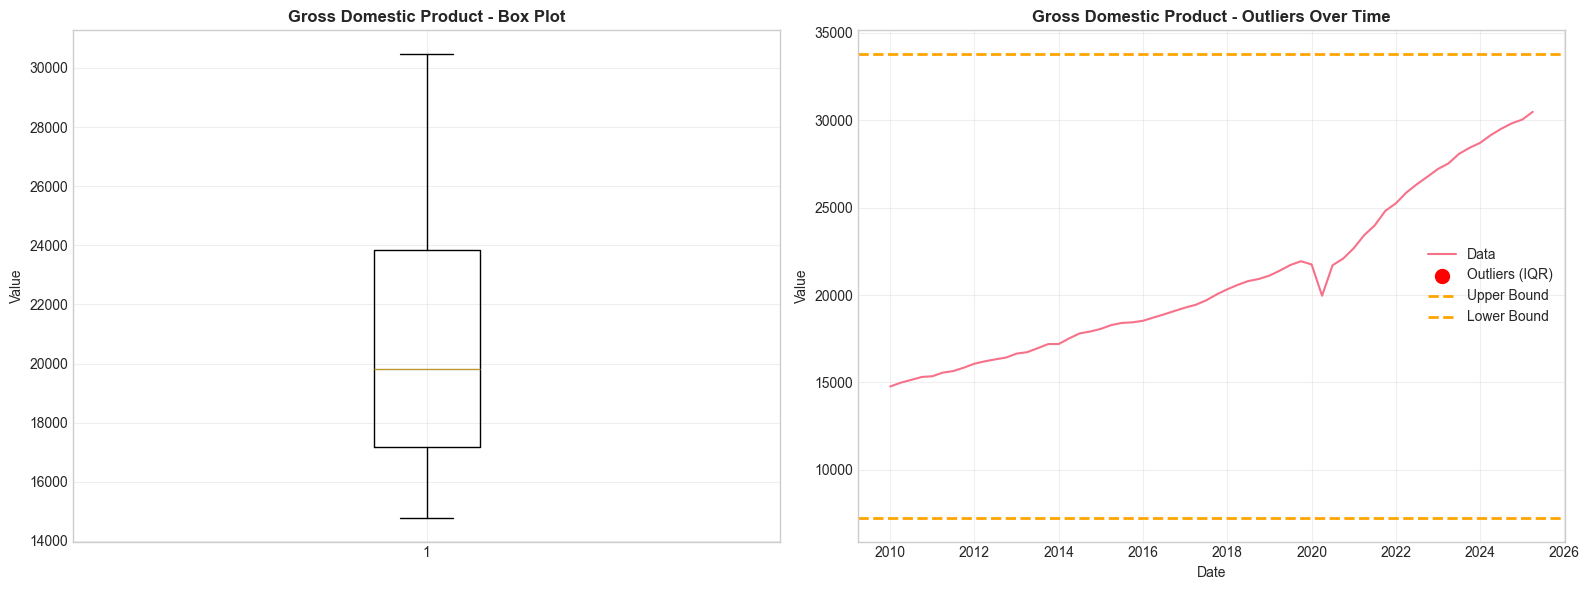


📊 Outlier Analysis for Federal Funds Rate:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


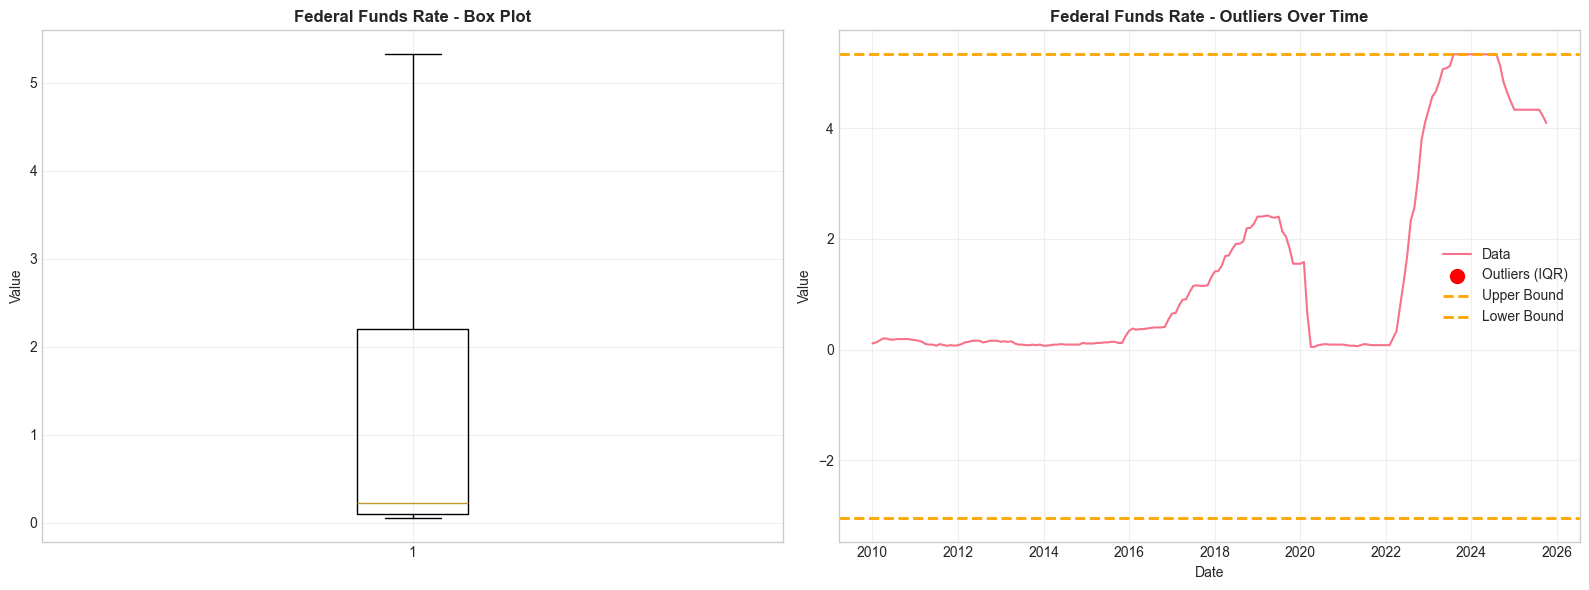


📊 Outlier Analysis for Housing Starts:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


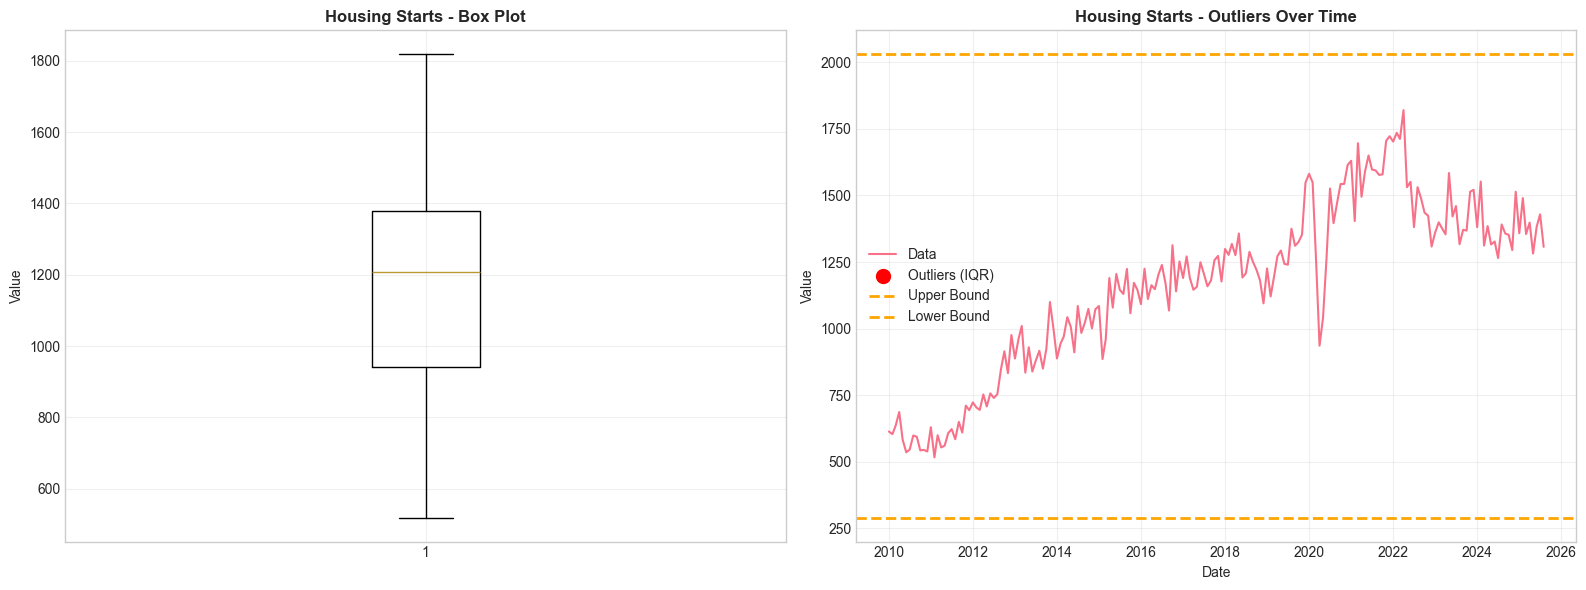


📊 Outlier Analysis for Consumer Sentiment:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


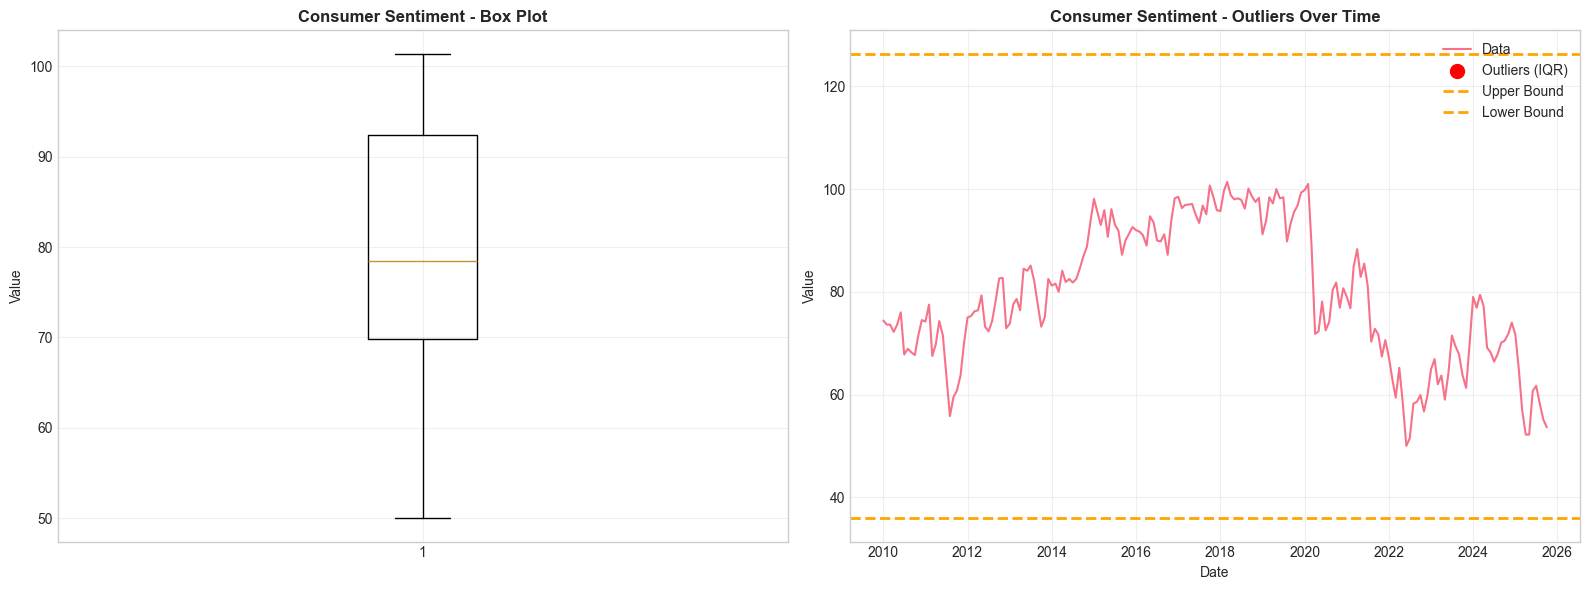


📊 Outlier Analysis for Industrial Production:
   IQR Method: 6 outliers detected
   Z-score Method (|z| > 3): 2 outliers detected

   Outlier dates (IQR):
      2010-01-01: 89.19
      2010-02-01: 89.50
      2010-03-01: 90.14
      2010-04-01: 90.46
      2020-04-01: 84.68
      2020-05-01: 86.01


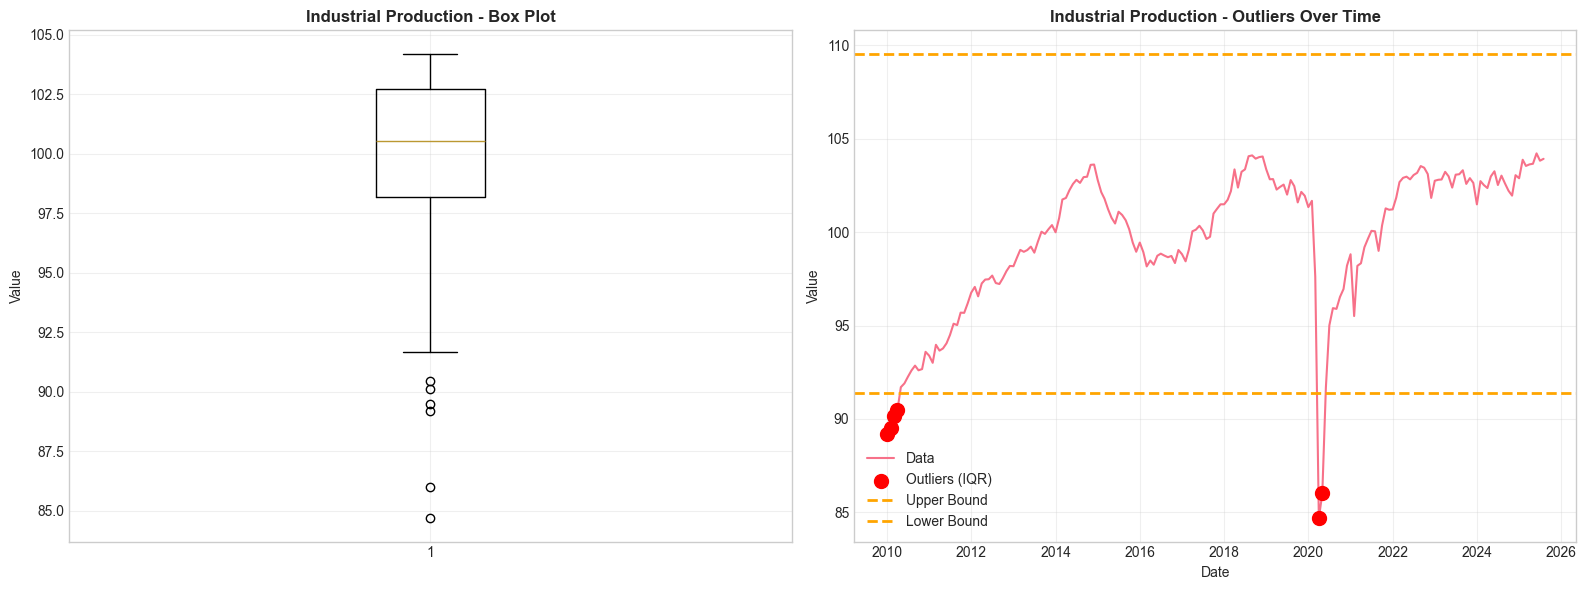


📊 Outlier Analysis for Total Nonfarm Payrolls:
   IQR Method: 0 outliers detected
   Z-score Method (|z| > 3): 0 outliers detected


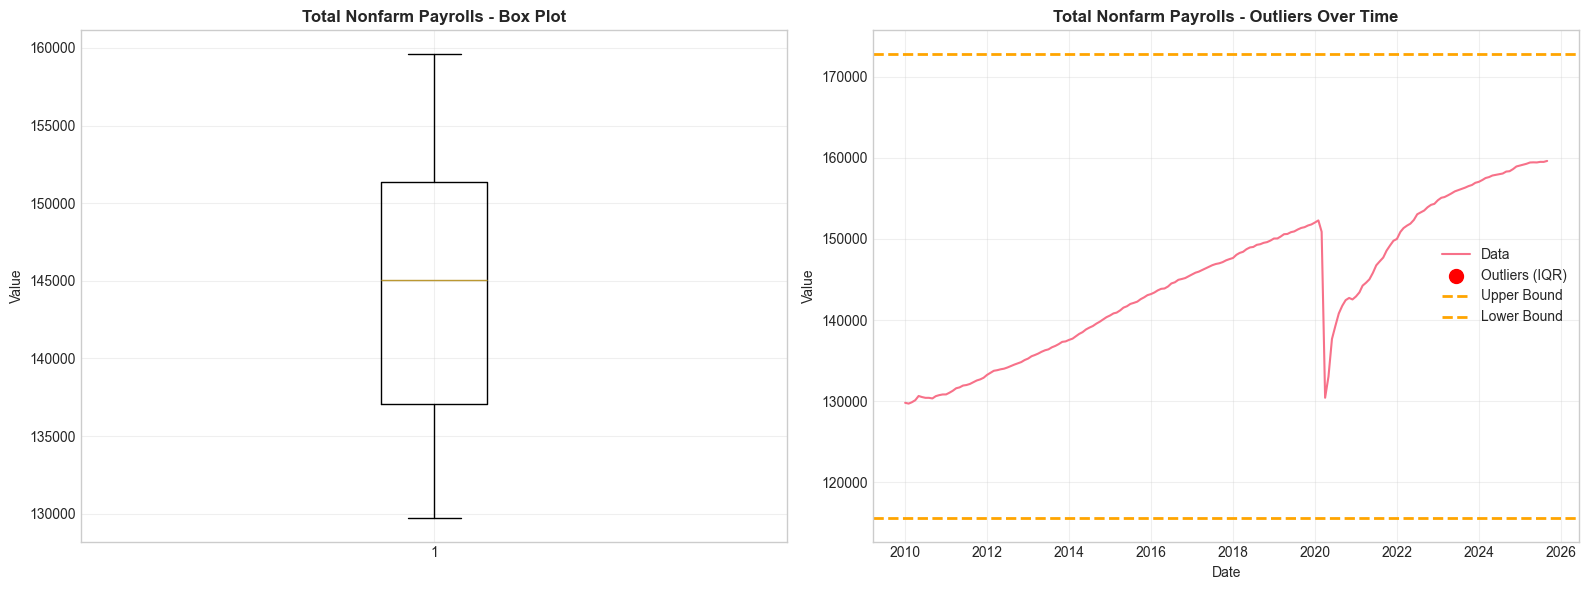


📊 Outlier Analysis for Unemployment Rate_pct_change:
   IQR Method: 7 outliers detected
   Z-score Method (|z| > 3): 1 outliers detected

   Outlier dates (IQR):
      2020-03-01: 25.71
      2020-04-01: 236.36
      2020-05-01: -10.81
      2020-06-01: -16.67
      2020-08-01: -17.65
      2020-10-01: -11.54
      2021-07-01: -8.47


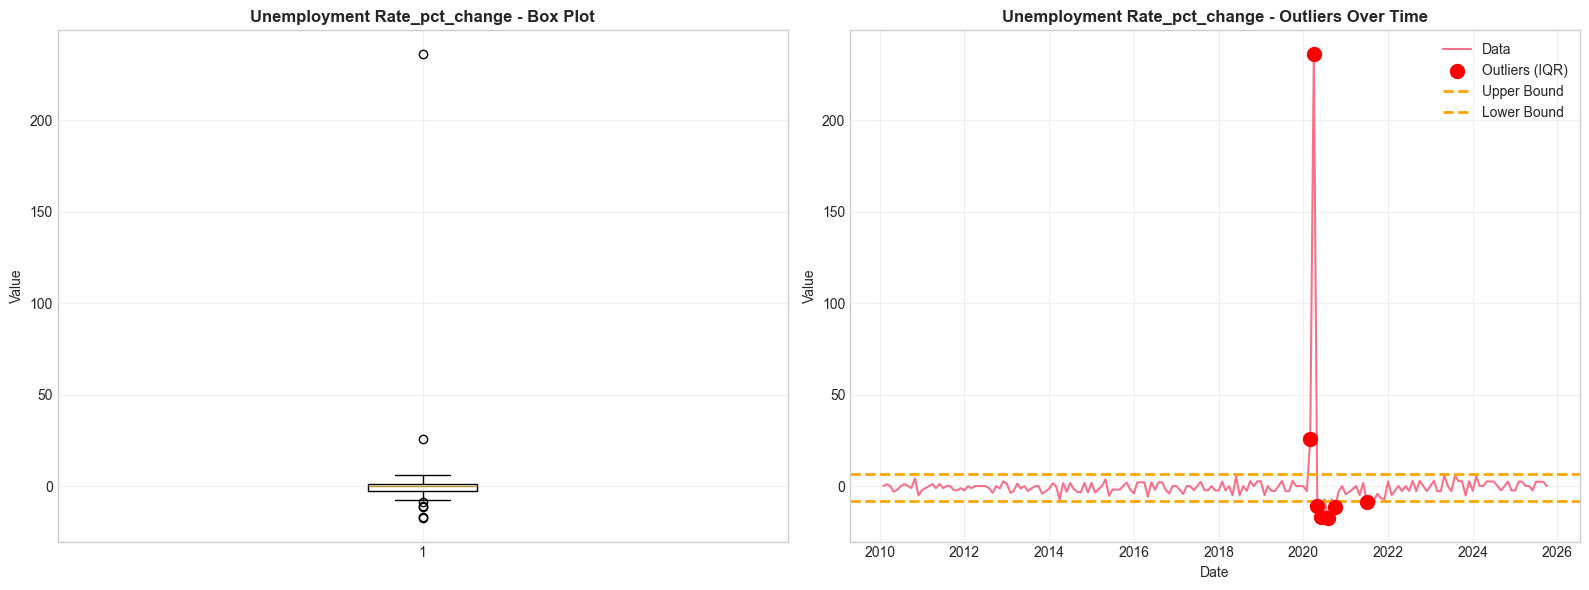

In [28]:
# Detect outliers for all indicators
outlier_results = {}
for col in economic_data.columns:
    outlier_results[col] = detect_outliers(economic_data, col)


# ============================================
# STEP 12: SUMMARY REPORT
# ============================================


In [29]:
print("\n" + "="*60)
print("📊 STEP 12: EDA SUMMARY REPORT")
print("="*60)

def generate_eda_report(df, stationarity_results, outlier_results):
    """
    Generate comprehensive EDA summary
    """
    report = []
    
    report.append("\n" + "="*60)
    report.append("EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
    report.append("="*60)
    
    report.append(f"\n📅 Time Period: {df.index.min().date()} to {df.index.max().date()}")
    report.append(f"📊 Number of Indicators: {df.shape[1]}")
    report.append(f"📈 Total Observations: {df.shape[0]}")
    
    report.append("\n" + "-"*60)
    report.append("INDICATOR SUMMARY:")
    report.append("-"*60)
    
    for col in df.columns:
        report.append(f"\n🔹 {col}:")
        report.append(f"   Mean: {df[col].mean():.2f}")
        report.append(f"   Std Dev: {df[col].std():.2f}")
        report.append(f"   Min: {df[col].min():.2f}")
        report.append(f"   Max: {df[col].max():.2f}")
        report.append(f"   Missing: {df[col].isnull().sum()} ({(df[col].isnull().sum()/len(df)*100):.1f}%)")
        
        # Stationarity
        if col in stationarity_results:
            p_value = stationarity_results[col][1]
            status = "Stationary" if p_value < 0.05 else "Non-Stationary"
            report.append(f"   Stationarity: {status} (p={p_value:.4f})")
        
        # Outliers
        if col in outlier_results:
            n_outliers = len(outlier_results[col][0])
            report.append(f"   Outliers: {n_outliers}")
    
    report.append("\n" + "="*60)
    report.append("KEY FINDINGS:")
    report.append("="*60)
    
    # Add key findings based on analysis
    report.append("\n✅ Data Quality:")
    total_missing = df.isnull().sum().sum()
    if total_missing == 0:
        report.append("   • No missing values detected")
    else:
        report.append(f"   • {total_missing} missing values require attention")
    
    report.append("\n✅ Correlations:")
    corr_matrix = df.corr()
    strong_corr = (corr_matrix.abs() > 0.7) & (corr_matrix < 1.0)
    n_strong = strong_corr.sum().sum() // 2
    report.append(f"   • {n_strong} pairs with strong correlation (|r| > 0.7)")
    
    report.append("\n✅ Stationarity:")
    stationary_count = sum([1 for col in stationarity_results 
                           if stationarity_results[col][1] < 0.05])
    report.append(f"   • {stationary_count}/{len(df.columns)} indicators are stationary")
    report.append(f"   • {len(df.columns) - stationary_count} require differencing for modeling")
    
    report.append("\n" + "="*60)
    report.append("NEXT STEPS:")
    report.append("="*60)
    report.append("1. Handle missing values (forward fill, interpolation)")
    report.append("2. Apply differencing to non-stationary series")
    report.append("3. Feature engineering (lags, rolling statistics)")
    report.append("4. Build forecasting models (ARIMA, Prophet, LSTM)")
    report.append("5. Evaluate model performance")
    report.append("="*60)
    
    # Print report
    for line in report:
        print(line)
    
    # Save to file
    with open('eda_report.txt', 'w') as f:
        f.write('\n'.join(report))
    
    print("\n💾 Report saved to 'eda_report.txt'")

generate_eda_report(economic_data, stationarity_results, outlier_results)



📊 STEP 12: EDA SUMMARY REPORT

EXPLORATORY DATA ANALYSIS - SUMMARY REPORT

📅 Time Period: 2010-01-01 to 2025-10-01
📊 Number of Indicators: 9
📈 Total Observations: 190

------------------------------------------------------------
INDICATOR SUMMARY:
------------------------------------------------------------

🔹 Unemployment Rate:
   Mean: 5.72
   Std Dev: 2.21
   Min: 3.40
   Max: 14.80
   Missing: 1 (0.5%)
   Stationarity: Stationary (p=0.0469)
   Outliers: 2

🔹 Consumer Price Index:
   Mean: 257.33
   Std Dev: 31.25
   Min: 217.20
   Max: 324.37
   Missing: 1 (0.5%)
   Stationarity: Non-Stationary (p=0.9866)
   Outliers: 0

🔹 Gross Domestic Product:
   Mean: 20883.68
   Std Dev: 4606.92
   Min: 14764.61
   Max: 30485.73
   Missing: 128 (67.4%)
   Stationarity: Non-Stationary (p=0.9985)
   Outliers: 0

🔹 Federal Funds Rate:
   Mean: 1.39
   Std Dev: 1.81
   Min: 0.05
   Max: 5.33
   Missing: 0 (0.0%)
   Stationarity: Non-Stationary (p=0.2738)
   Outliers: 0

🔹 Housing Starts:
   Mean:

In [30]:
print("\n" + "="*60)
print("🎉 EDA COMPLETE!")
print("="*60)
print("\n✅ All analysis steps completed successfully!")
print("✅ Visualizations generated")
print("✅ Statistical tests performed")
print("✅ Summary report created")
print("\nYou're now ready to build forecasting models! 🚀")



🎉 EDA COMPLETE!

✅ All analysis steps completed successfully!
✅ Visualizations generated
✅ Statistical tests performed
✅ Summary report created

You're now ready to build forecasting models! 🚀
